In [1]:
# PROJET3_DATA_SCIENTIST_OCR
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//OCR_DS_P3_Concevez_Application_Au_Service_Santé_Public')

In [2]:
# 1-Chargement des Librairies Utilisées.
import pandas as pd
import numpy as  np
import collections
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from decimal import Decimal
import seaborn as sns
import inspect
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import CategoricalDtype
from pandas.api.types import is_numeric_dtype
from collections import Counter
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.neighbors import KDTree
from sklearn.impute import SimpleImputer 
from  sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# Optimisation automatique des colonnes pour avoir un maximum d'information.
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [4]:
# 2-IMPORTATION DES DONNEES. fr.openfoodfacts.org.products.csv
data = pd.read_csv('DONNEES/fr.openfoodfacts.org.products.csv', sep='\t')
# Visualisation du Dataset.
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [5]:
# Fonction Décrivant les Informations Générales Contenues Dans le Dataset.
def general_info(dataframe):
  dataframe.info()
  print(" ")
  print(" ")
  print(" ")

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]
  print("Le jeu de données a {} lignes et {} colonnes.".format(lignes,colonnes))

In [6]:
# Application de la Fonction au Dataset.
general_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
 
 
 
Le jeu de données a 320772 lignes et 162 colonnes.


In [7]:
# Le Dataset a 320772 lignes et 162 colonnes.
# Le Dataset Open Food Fact contient, 162 colonnes (variables différentes) pour 320772 lignes (chaque ligne correspond à un produit alimentaire recueillit dans la base de données d'Open Food Fact). Les premières lignes, laissent apparaître de nombreuses données manquantes (NAN).

In [8]:
# Types de données Contenus dans le Dataset.
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [9]:
# Nombre de Types de données Object.
data.select_dtypes(['O']).columns.nunique()

56

In [10]:
# Effectif de Types de données Float.
data.select_dtypes(['float64']).columns.nunique()

106

In [11]:
# Dans le Dataset, il existe 2 types de données. Certaines variables sont considérées comme des Objets (au nombre de 56 et concernent les données sous forme de chaine de caractères), et d'autres sont de type float64 (au nombre de 106, contiennent des valeurs décimales et qui correspondent aux différents composants de chaque produit).

In [12]:
# Identification des Colonnes du Dataset.
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(data.columns)]
# Visualisation du Dataset.
col_mapping

['0:code',
 '1:url',
 '2:creator',
 '3:created_t',
 '4:created_datetime',
 '5:last_modified_t',
 '6:last_modified_datetime',
 '7:product_name',
 '8:generic_name',
 '9:quantity',
 '10:packaging',
 '11:packaging_tags',
 '12:brands',
 '13:brands_tags',
 '14:categories',
 '15:categories_tags',
 '16:categories_fr',
 '17:origins',
 '18:origins_tags',
 '19:manufacturing_places',
 '20:manufacturing_places_tags',
 '21:labels',
 '22:labels_tags',
 '23:labels_fr',
 '24:emb_codes',
 '25:emb_codes_tags',
 '26:first_packaging_code_geo',
 '27:cities',
 '28:cities_tags',
 '29:purchase_places',
 '30:stores',
 '31:countries',
 '32:countries_tags',
 '33:countries_fr',
 '34:ingredients_text',
 '35:allergens',
 '36:allergens_fr',
 '37:traces',
 '38:traces_tags',
 '39:traces_fr',
 '40:serving_size',
 '41:no_nutriments',
 '42:additives_n',
 '43:additives',
 '44:additives_tags',
 '45:additives_fr',
 '46:ingredients_from_palm_oil_n',
 '47:ingredients_from_palm_oil',
 '48:ingredients_from_palm_oil_tags',
 '49:i

In [13]:
# Répartition de Données Manquantes par variables. 
data.isna().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

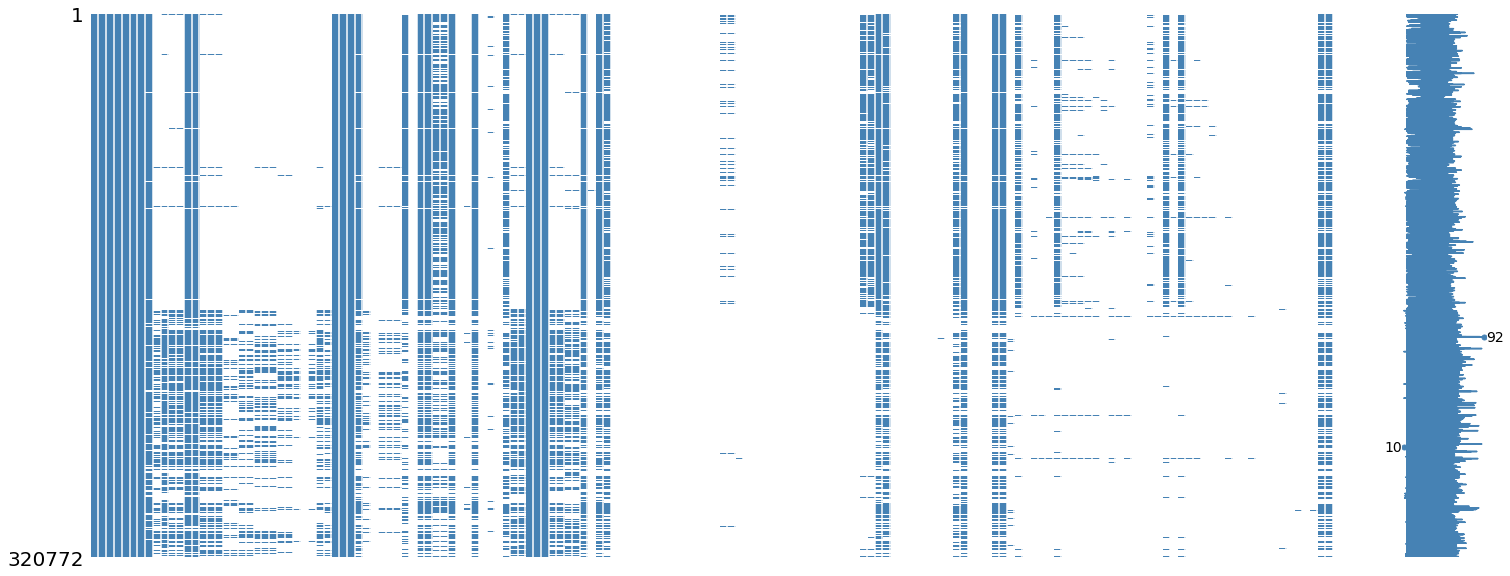

In [14]:
# Matrix des Valeurs Manquantes.
color=(70/255, 130/255, 180/255)
msno.matrix(data,color=color)
plt.savefig('GRAPHS/graph_nettoyage/1- Matrix_data')
plt.show()

In [15]:
# On remarque qu'il y a beaucoup de données manquantes dans notre jeu de données. Certaines colonnes sont totalement vides alors que d'autres sont totalement complètes. Ce graphique nous permet de voir globalement la répartition des données manquantes mais on ne connaît pas exactement le taux de données manquantes dans le jeu de données.

In [16]:
# Pourcentage des Valeurs Manquantes.
def NaN_pie(dataframe):

  lignes = dataframe.shape[0] 
  colonnes = dataframe.shape[1]

  # nombre de données non manquante
  nb_data = dataframe.count().sum()

  # nombre de données totale de ce jeu de données (colonnes*lignes)
  nb_totale = (colonnes*lignes)

  #taux remplissage jeu de données
  rate_dataOK = (nb_data/nb_totale)
  print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
  print("et il a {:.2%} de données manquantes".format(1-rate_dataOK))
  print(" ")
  print(" ")

     
  # Pie Plot
  rates = [rate_dataOK, 1 - rate_dataOK]
  labels = ["Données", "NAN"]

  explode =(0,0.1) 
  colors = ['gold', 'pink']

  # Plot
  plt.figure(figsize=(12,15))
  plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})

  ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 32)
  ttl.set_position([0.5, 0.85])

  plt.axis('equal')
  #ax.legend(labels, loc = "upper right", fontsize = 18)
  plt.tight_layout() 

  plt.show()

Le jeux de données est rempli à 23.78%
et il a 76.22% de données manquantes
 
 


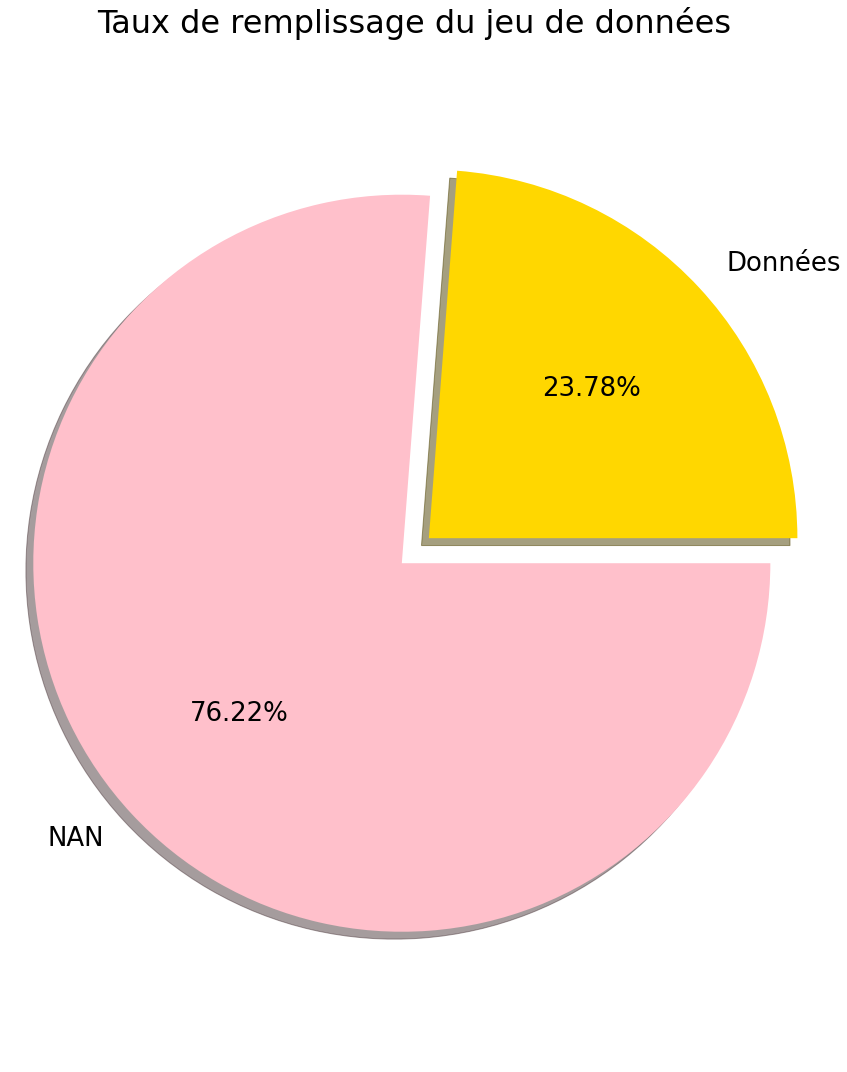

<Figure size 432x288 with 0 Axes>

In [17]:
# Application de la Fonction.
NaN_pie(data)
plt.savefig('GRAPHS/graph_nettoyage/2- Taux_NaN')
plt.show()

In [18]:
# Après avoir vu la répartition de nos données manquantes, on peut plus précisément dire que notre jeu de données est composé à 76.22% de données manquantes.

In [19]:
# Répartition des données entre les variables des colonnes.
def graphique_taux_remplissage_variable(dataframe):
  # Répartition du taux de remplissage des colonnes: 
  df = pd.DataFrame(round(dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0],columns=['Taux de remplissage']).sort_values('Taux de remplissage', ascending=False).reset_index()
  fig, ax = plt.subplots(figsize=(10,30))
  sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
  plt.title('Taux de remplissage des variables - %', fontsize = 30)
  plt.show()

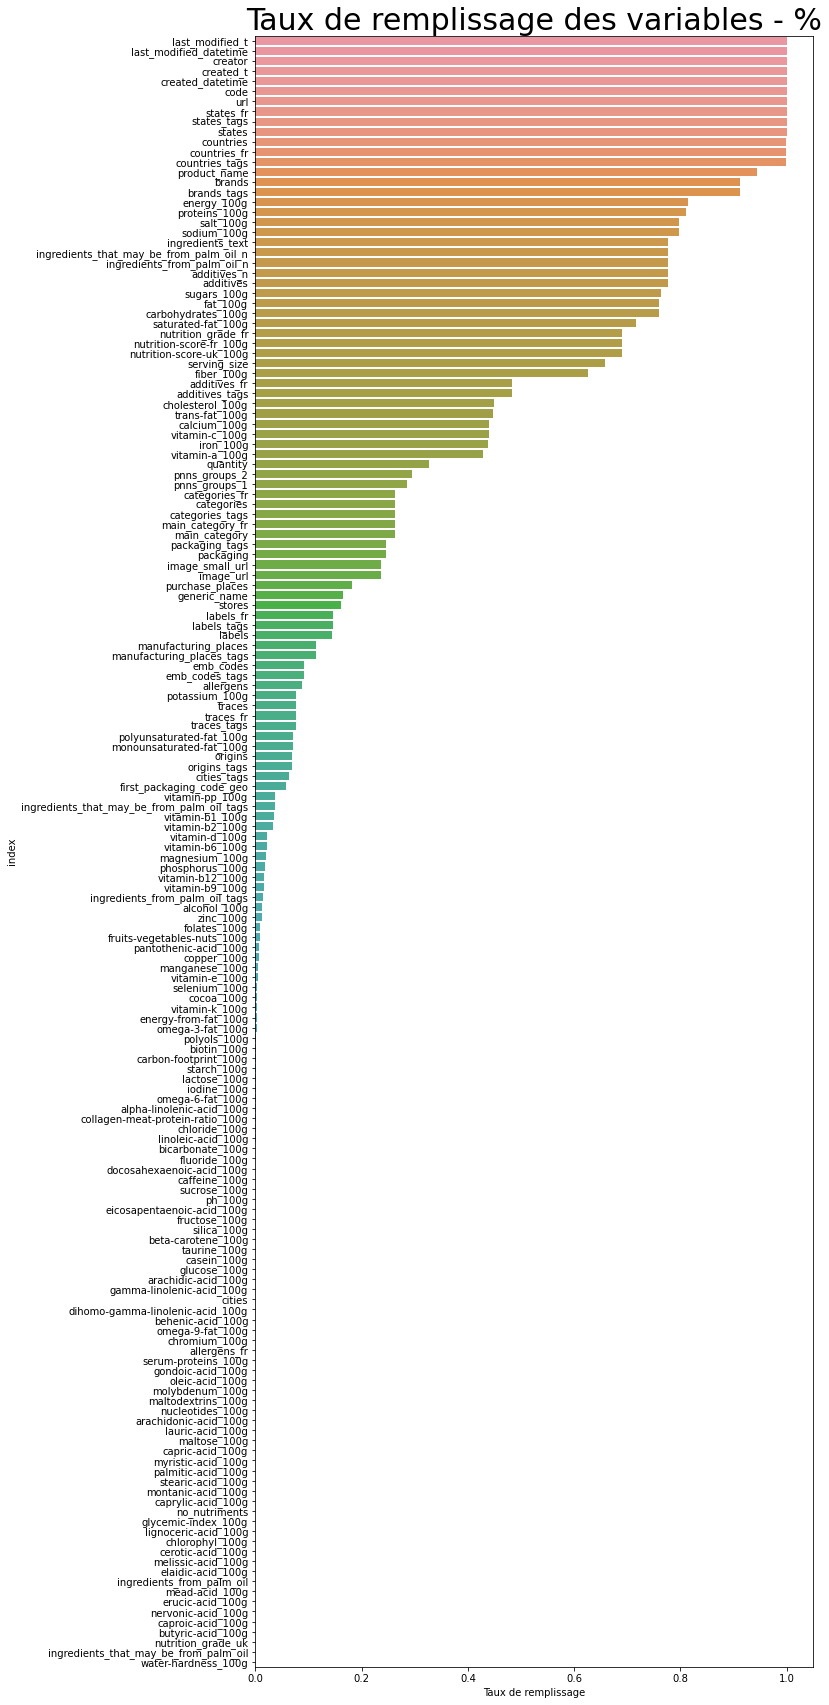

<Figure size 432x288 with 0 Axes>

In [20]:
# Application de la Fonction.
graphique_taux_remplissage_variable(data)
plt.savefig('GRAPHS/graph_nettoyage/3- %Remplissage')
plt.show()

In [21]:
# Dans notre Dataset, les données ne sont pas réparties de façon égale car peu de colonnes ont un taux de remplissage supérieur à 40 %.

In [22]:
# Répartition du nutriscore.
data['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

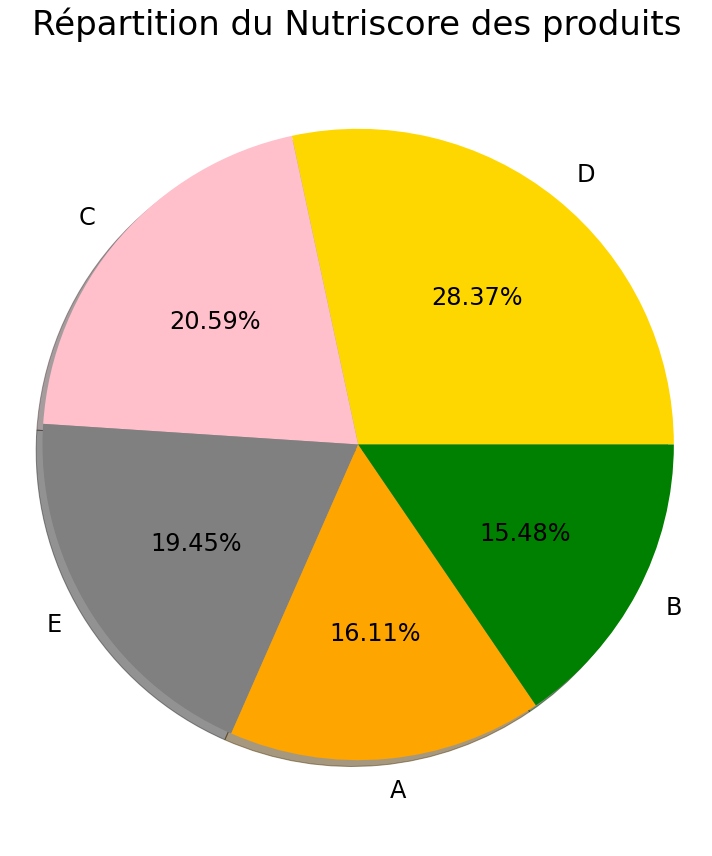

In [23]:
# Représentation Graphique des données de nutrition_grade_fr.
# Data to plot
values = data['nutrition_grade_fr'].value_counts()
labels = data['nutrition_grade_fr'].value_counts().index.str.upper()
colors = ['gold', 'pink', 'grey', 'orange', 'green']
explode =(0, 0, 0, 0, 0) 
# Plot
plt.figure(figsize=(10,12))
plt.pie(values, explode=explode, labels=labels, colors=colors,
autopct='%.2f%%', shadow=True, textprops={'fontsize': 24})
ttl=plt.title("Répartition du Nutriscore des produits", fontsize = 34) 
ttl.set_position([0.5, 0.90])
plt.axis('equal')
plt.tight_layout() 
plt.savefig('GRAPHS/graph_nettoyage/4- Nutriscore')
plt.show()

In [24]:
# Dans la Dataset mise à notre disposition, les produits que l'on retrouve le plus ont un nutriscore C, D ou E.

In [25]:
# Découvrons la variable ingredients_from_palm_oil_tags'.
data['ingredients_from_palm_oil_tags'].unique()

array([nan, 'huile-de-palme', 'e304-palmitate-d-ascorbyle',
       'oleine-de-palme', 'huile-de-palme,e304-palmitate-d-ascorbyle',
       'huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme',
       'mono-et-diglycerides-d-acides-gras-de-palme',
       'e304-palmitate-d-ascorbyle,huile-de-palme',
       'huile-de-palme,stearine-de-palme',
       'huile-de-palme,oleine-de-palme',
       'mono-et-diglycerides-d-acides-gras-de-palme,huile-de-palme',
       'oleine-de-palme,huile-de-palme', 'stearine-de-palme',
       'stearine-de-palme,huile-de-palme',
       'oleine-de-palme,e304-palmitate-d-ascorbyle'], dtype=object)

In [26]:
# Dimension du Dataset après nettoyage;
data.shape

(320772, 162)

In [28]:
# Création d'un nouveau fichier contenant uniquement les informations qui nous intéressent pour de futures analyses.
# Élimination des données trop grandes ou trop petite.'soluble-fiber_100g','insoluble-fiber_100g','fruits-vegetables-nuts-dried_100g','fruits-vegetables-nuts-estimate_100g','carbon-footprint-from-meat-or-fish_100g','choline_100g','phylloquinone_100g','beta-glucan_100g','inositol_100g',,'carnitine_100g'
cols_100g = ['energy_100g','fat_100g','saturated-fat_100g','energy-from-fat_100g','butyric-acid_100g','caproic-acid_100g',
             'caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g','palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','behenic-acid_100g',
             'lignoceric-acid_100g','cerotic-acid_100g','montanic-acid_100g','melissic-acid_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','omega-3-fat_100g',
             'alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g',
             'dihomo-gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g','gondoic-acid_100g','mead-acid_100g','erucic-acid_100g','nervonic-acid_100g',
             'trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','sucrose_100g','glucose_100g','fructose_100g','lactose_100g','maltose_100g','maltodextrins_100g','starch_100g',
             'polyols_100g','fiber_100g','proteins_100g','casein_100g','serum-proteins_100g','nucleotides_100g','salt_100g','sodium_100g',
             'alcohol_100g','vitamin-a_100g','beta-carotene_100g','vitamin-d_100g','vitamin-e_100g','vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g',
             'vitamin-b6_100g','vitamin-b9_100g','folates_100g','vitamin-b12_100g','biotin_100g','pantothenic-acid_100g','silica_100g','bicarbonate_100g','potassium_100g','chloride_100g',
             'calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','selenium_100g','chromium_100g','molybdenum_100g',
             'iodine_100g','caffeine_100g','taurine_100g','ph_100g','fruits-vegetables-nuts_100g',
             'collagen-meat-protein-ratio_100g','cocoa_100g','chlorophyl_100g','carbon-footprint_100g','nutrition-score-fr_100g',
             'nutrition-score-uk_100g','glycemic-index_100g','water-hardness_100g']
             
for cols in cols_100g:
    if cols != 'energy_100g' :
    #valeur trop grande
      data.loc[data[cols] > 100, cols] = np.nan
      #valeur trop petite
      data.loc[data[cols] < 0, cols] = np.nan
    else:
      #data.drop(data[data[cols] > 37000].index, inplace=True)
    #valeur trop grande
      data.loc[data[cols] > 3700, cols] = np.nan
      #valeur trop petite
      data.loc[data[cols] < 0, cols] = np.nan
for cols in cols_100g:
    if cols == 'nutrition-score-fr_100g' :
    #valeur trop grande
      data.loc[data[cols] > 40, cols] = np.nan
      #valeur trop petite
      data.loc[data[cols] < -15, cols] = np.nan

In [29]:
# Dimension du,Dataset.
data.shape

(320772, 162)

In [30]:
# Élimination des colonnes non-pertinentes pour le projet.
def columns_removed(dataframe) :
    colonnes = dataframe.columns.tolist()
    columns_to_delete = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
                         'quantity', 'packaging', 'brands', 'categories', 'emb_codes_tags',
                         'origins', 'manufacturing_places', 'labels', 'emb_codes', 'first_packaging_code_geo', 
                         'cities', 'purchase_places', 'stores', 'traces', 'serving_size', 
                         'no_nutriments', 'additives_n', 'additives', 'ingredients_from_palm_oil_n', 
                         'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil',  
                         'states','states_tags', 'main_category', 'image_url', 'image_small_url',  
                         'energy-from-fat_100g',  'nutrition-score-uk_100g', 'cities_tags']
                         
    for column in columns_to_delete:
        try:
            colonnes.remove(column)
        except:
            print('...colonne non présente : ', column)
            print('\n')
    print("Toutes les colonnes présentes ont été suprimées du jeu de données")
    return dataframe[colonnes]

In [31]:
# Application de la Fonction.
cleaned_data = columns_removed(data)
# Visualisation du Fichier nettoyé.
cleaned_data

Toutes les colonnes présentes ont été suprimées du jeu de données


,code,product_name,generic_name,packaging_tags,brands_tags,categories_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_tags,labels_fr,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces_tags,traces_fr,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g
0,3087,Farine de blé noir,NaN,NaN,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,"A compléter,Informations nutritionnelles compl...",NaN,2243.0,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN
2,4559,Peanuts,NaN,NaN,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,NaN,NaN,"A compléter,Informations nutritionnelles compl...",NaN,1941.0,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,

In [32]:
# Restriction aux produits vendus en France 
#récupération des produits vendus en france uniquement mais également des produits vendus en france ainsi que dans d'autres pays
def france_juste(dataframe):
  print("Nombre de pays pour la vente de produits alimentaires : {} ".format(len(dataframe.countries.unique().tolist())))
  searchfor = ['Fr', 'fr', "Réunion", "Nouvelle-Calédonie", "Martinique", "Guadeloupe", "Mayotte"]
  dataframe = dataframe[dataframe['countries'].str.contains('|'.join(searchfor),  na = True)]
  print("Nombre de pays associés à la France pour la vente de certains produits alimentaires : {} ".format(len(dataframe[dataframe['countries'].str.contains('|'.join(searchfor),  na = True)].countries.unique().tolist())))
  return dataframe

In [33]:
# Court nettoyage et Application de la Fonction.
cleaned_short = france_juste(cleaned_data)

Nombre de pays pour la vente de produits alimentaires : 1435 
Nombre de pays associés à la France pour la vente de certains produits alimentaires : 667 


In [34]:
# Dimension du Fichier précédent.
cleaned_short.shape

(81646, 126)

In [35]:
# Sélection des lignes ayant le nom des produits.
cleaned_short.dropna(subset=['product_name'], inplace=True)
cleaned_short.isna().sum()

code                                              0
product_name                                      0
generic_name                                  41686
packaging_tags                                22949
brands_tags                                    1164
categories_tags                               18444
categories_fr                                 18444
origins_tags                                  64743
manufacturing_places_tags                     54016
labels_tags                                   45079
labels_fr                                     45079
countries                                       228
countries_tags                                  228
countries_fr                                    228
ingredients_text                              26586
allergens                                     57226
allergens_fr                                  80117
traces_tags                                   60982
traces_fr                                     60982
additives_ta

In [36]:
# Passage du Nutriscore grade en capital.
def upper_nutriscore(dataframe) :
  dataframe['nutrition_grade_fr'] = dataframe['nutrition_grade_fr'].str.upper()
  return dataframe

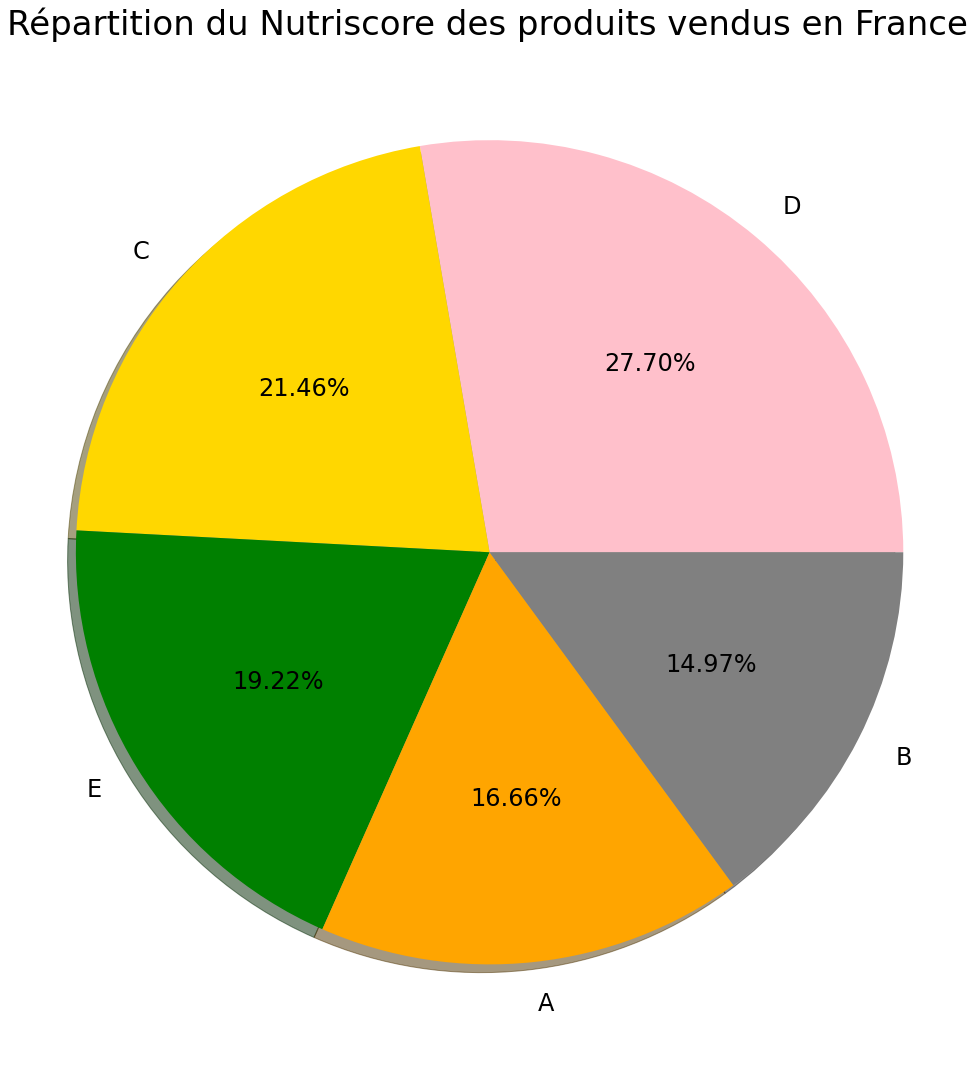

In [37]:
# Répartition du Nutriscore pour les produits vendus en France.
values = cleaned_short['nutrition_grade_fr'].value_counts()
labels = ['D', 'C', 'E', 'A', 'B']
explode =(0, 0, 0, 0, 0) 
colors = ['pink', 'gold', 'green', 'orange', 'grey']
# Plot
plt.figure(figsize=(13,15))
plt.pie(values, explode=explode, labels=labels, colors=colors,
autopct='%.2f%%', shadow=True, textprops={'fontsize': 24})
ttl=plt.title("Répartition du Nutriscore des produits vendus en France", fontsize = 34) 
ttl.set_position([0.5, 0.85])
plt.axis('equal')
plt.tight_layout() 
plt.savefig('GRAPHS/graph_nettoyage/5- Nutriscore_Fce')
plt.show()

In [38]:
# Les produits vendus en France ont essentiellement un nutriscore C, D ou E.

In [39]:
# Supression des potentiels doublons (Filtrage sur le code-barres EAN-13 (colonne 'code'))
def duplicata(dataframe) :
  before = len(dataframe)
  dataframe = dataframe.drop_duplicates(subset='code')
  after = len(dataframe)
  print("Il y a {} duplicats qui ont été retirés du jeu de données" .format(before-after))
  return dataframe

In [40]:
# Application de la Fonction.
cleaned_short_data = duplicata(cleaned_short)

Il y a 2 duplicats qui ont été retirés du jeu de données


Le jeux de données est rempli à 19.01%
et il a 80.99% de données manquantes
 
 


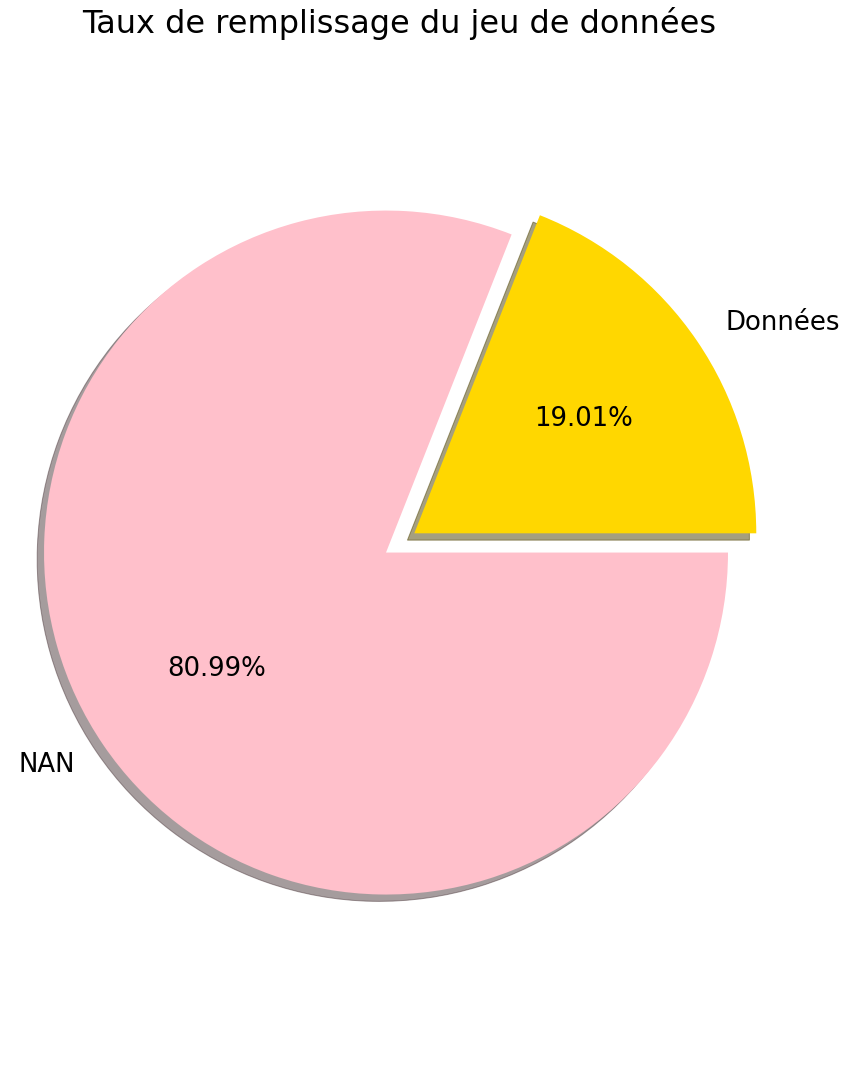

<Figure size 432x288 with 0 Axes>

In [41]:
# Déterminons les Données Manquantes dans ce Nouveau Dataset.
NaN_pie(cleaned_short_data)
plt.savefig('GRAPHS/graph_nettoyage/6- Taux_NaN2')
plt.show()

In [42]:
# La filtration effectuée sur les colonnes et les lignes, présente 81,22% de données manquantes dans le nouveau dataset. Ce résultat peut s'expliquer par la supression de colonnes totalement remplies mais non utiles à notre travail (e.g: l'url des images pour les pages web) et du fait que de nombreux produits non vendus en France ont été supprimés.
# Pour diminuer ce taux de NaN, supprimer les colonnes dont le taux de remplissage est trop faible pour être fiable pour nos études futures.

In [43]:
# Afin de rechercher du gluten dans les produits, la colonne des ingredients_text est importante et ne doit pas contenir de "Nan". Ce pour ça que j'ai supprimer les Nan.
dff = cleaned_short_data.dropna(subset=['ingredients_text'])
# Visualisation
dff

,code,product_name,generic_name,packaging_tags,brands_tags,categories_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_tags,labels_fr,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces_tags,traces_fr,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g
106,36252,Lion Peanut x2,NaN,NaN,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,NaN,NaN,en:e322,E322 - Lécithines,NaN,NaN,NaN,e,unknown,unknown,"A compléter,Informations nutritionnelles compl...",NaN,1883.0,20.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,70.0,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,NaN,NaN,NaN,0.09652,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN
182,5200016,lentilles vertes,NaN,sachet-plastique,bertrand-lejeune,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",France,en:france,France,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes,"A compléter,Informations nutritionnelles à com...",Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,"carton,boite",st-michel,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,"france,avranches",en:green-dot,Point Vert,France,en:france,France,"Sucre, farine de _Blé_, graisse et huiles végé...","

In [44]:
# Remplacement.
dffs = dff.replace('$','')

In [45]:
# Crée un colonne pour Gluten.
dffs['Gluten'] = 0
index_glut = dffs['ingredients_text'].str.contains('Gluten|gluten')
dffs.loc[index_glut,'Gluten'] = 1

In [46]:
# Variable Gluten.
dffs.loc[dffs.Gluten == 1,'ingredients_text']

458       Farine de _blé_ contient _Gluten_ (avec farine...
459       Farine de _blé_ contient _gluten_ (avec farine...
509       }ookles syrup INGREDIENTS Wheatflour contains ...
1356      Farine de _blé_ contient _Gluten_ (avec Farine...
9891      Farine de _blé_ contient _Gluten_ (avec Farine...
                                ...                        
316859    Ail, eau, sel, sucre, sauce de soja (haricot d...
318124    Glutenfreie Haferflocken, Glutenfreies Crunchy...
318125    flocon d'avoine sans gluten 74%, raisins (rais...
318592    Boulgour de blé complet précuit 45,5%, quinoa ...
320113    Blue Agave Syrup, Inulin (Dietary Fibre), Cash...
Name: ingredients_text, Length: 3510, dtype: object

In [47]:
# Visualisation des premières lignes.
dffs.head()

,code,product_name,generic_name,packaging_tags,brands_tags,categories_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_tags,labels_fr,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces_tags,traces_fr,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g,Gluten
106,36252,Lion Peanut x2,NaN,NaN,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,NaN,NaN,en:e322,E322 - Lécithines,NaN,NaN,NaN,e,unknown,unknown,"A compléter,Informations nutritionnelles compl...",NaN,1883.0,20.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,70.0,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,NaN,NaN,NaN,0.09652,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,0
182,5200016,lentilles vertes,NaN,sachet-plastique,bertrand-lejeune,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",France,en:france,France,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes,"A compléter,Informations nutritionnelles à com...",Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,"carton,boite",st-michel,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,"france,avranches",en:green-dot,Point Vert,France,en:france,France,"Sucre, farine de _Blé_, graisse et huiles

In [48]:
# Suppression des colonnes qui ont un taux de données manquantes supérieures à une limite.
def filtration_colonnes(dataframe, taux_remplissage):
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    indexes = []
    #nombre de colonnes à l'origine
    nb_colonne = dataframe.shape[1]
    for col_name in dataframe.columns.tolist():
      if (col_name == 'product_name'):
        pass
      elif (col_name == 'nutrition-score-fr_100g'):
        pass
      elif (col_name == 'nutrition_grade_fr'):
        pass
      elif (col_name == 'packaging_tags'):
        pass
      elif (col_name == 'brands_tags'):
        pass      
      elif (col_name == 'origins_tags'):
        pass 
      elif (col_name == 'manufacturing_places_tags'):
        pass 
      elif (col_name == 'labels_tags'):
        pass 
      elif (col_name == 'countries_tags'):
        pass 
      elif (col_name == 'traces_tags'):
        pass 
      elif (col_name == 'additives_tags'):
        pass 
      elif (col_name == 'ingredients_from_palm_oil_tags'):
        pass 
      elif (col_name == 'ingredients_that_may_be_from_palm_oil_tags'):
        pass 
      elif (col_name == 'fiber_100g'):
        pass
      elif (col_name == 'energy_100g'):
        pass
      else :
        # taux de remplissage pour chaque colonne : (nombredeligne-nombredeNANparcolonne)/nombredeligne
        taux_data_colonne = (dataframe[col_name].shape[0] - dataframe[col_name].isna().sum())/dataframe[col_name].shape[0]  
        if taux_data_colonne < taux_remplissage:   #Filtration des colonnes dont le remplissage est supérieur à la limite
          dataframe.drop(col_name, axis = 1, inplace=True) 
    #nombre de colonnes au final
    nb_colonne_supp = nb_colonne - dataframe.shape[1]

    print("Avec cette fonction, 14 variables sont obligatoirement gardées")
    print("Nombre de colonnes avec un taux de remplissage supérieur à {:.2%} : {} colonnes.".format(taux_remplissage, dataframe.shape[1]))
    print("Nombre de colonnes supprimées : {} colonnes".format(nb_colonne_supp))
    print(" ")
    print(" ")

    return dataframe

In [49]:
# Application de la Fonction.
cleans_shorts = filtration_colonnes(dffs, 0.40)
# Visualisation.
cleans_shorts

Avec cette fonction, 14 variables sont obligatoirement gardées
Nombre de colonnes avec un taux de remplissage supérieur à 40.00% : 37 colonnes.
Nombre de colonnes supprimées : 90 colonnes
 
 


,code,product_name,generic_name,packaging_tags,brands_tags,categories_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_tags,labels_fr,countries,countries_tags,countries_fr,ingredients_text,allergens,traces_tags,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,Gluten
106,36252,Lion Peanut x2,NaN,NaN,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,en:e322,E322 - Lécithines,NaN,NaN,e,unknown,unknown,"A compléter,Informations nutritionnelles compl...",NaN,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,0
182,5200016,lentilles vertes,NaN,sachet-plastique,bertrand-lejeune,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",France,en:france,France,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes,"A compléter,Informations nutritionnelles à com...",Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,"carton,boite",st-michel,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,"france,avranches",en:green-dot,Point Vert,France,en:france,France,"Sucre, farine de _Blé_, graisse et huiles végé...","Blé, Beurre, Oeufs, Noisette","en:nuts,en:sesame-seeds,en:soybeans","en:e1400,en:e322,en:e503","E1400 - Dextrines,E322 - Lécithines,E503 - Car...",NaN,huile-vegetale,NaN,Sugary snacks,Biscuits and cakes,"A vérifier,Complet,Informations nutritionnelle...",Sablés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,NaN,aluminium,alice-delice,"en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",NaN,france,NaN,NaN,France,en:france,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,"en:eggs,en:gluten,en:milk,en:mustard,en:nuts,e...",NaN,NaN,NaN,NaN,NaN,Beverages,Non-sugared beverages,"A vérifier,Complet,Informations nutritionnelle...",Thés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,NaN,"carton,bouteille,verre",alice-delice,"en:syrups,fr:sirops-pour-ganache","Sirops,Sirops-pour-ganache",NaN,NaN,NaN,NaN,France,en:france,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,NaN,"en:e330,en:e171,en:e211,en:e131","E330 - Acide citrique,E171 - Oxyde de titane,E...",NaN,NaN,NaN,unknown,unknown,"A vérifier,Complet,Informations nutritionnelle...",Sirops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320743,9791463741241,Gingembre,NaN,"pot,metal",terre-exotique,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",sri-lanka,NaN,NaN,NaN,France,en:france,France,Gingembre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"A vérifier,Complet,Informations nutritionnelle...",Epices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320753,9871311007,Lager,Bière caribeenne de luxe,bouteille-en-verre-transparante,carib,"en:beverages,en:alcoholic-beverages,en:beers,e...","Boissons,Boissons alcoolisées,Bières,Bières bl...",NaN,"carib-brewery-ltd,champs-fleurs,trinidad,w-i","en:not-advised-for-specific-people,en:green-do...",Déconseillé à certaines catégories de personne...,NaN,NaN,NaN,"Eau, malt, sucre, houblon",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic beverages,"A compléter,Informations nutritionnell

In [50]:
# Le taux de remplisage des colonnes choisi est de 40%,  afin d'avoir le plus de données réelles possibles et des variables utiles pour l'exploration.

In [51]:
# Ne garder que les variables essentielles;
cleanes_shorts = cleans_shorts[['code','product_name','packaging_tags','brands_tags','origins_tags','manufacturing_places_tags','labels_tags','countries','countries_tags','traces_tags','additives_tags','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags','nutrition-score-fr_100g','nutrition_grade_fr','pnns_groups_1','pnns_groups_2','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','Gluten']]
# Visualisation.
cleanes_shorts

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
106,36252,Lion Peanut x2,NaN,sunridge,NaN,NaN,NaN,"France, US","en:france,en:united-states",NaN,en:e322,NaN,NaN,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
182,5200016,lentilles vertes,sachet-plastique,bertrand-lejeune,NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-bio...",France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,"carton,boite",st-michel,NaN,"france,avranches",en:green-dot,France,en:france,"en:nuts,en:sesame-seeds,en:soybeans","en:e1400,en:e322,en:e503",NaN,huile-vegetale,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,aluminium,alice-delice,NaN,france,NaN,France,en:france,"en:eggs,en:gluten,en:milk,en:mustard,en:nuts,e...",NaN,NaN,NaN,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,"carton,bouteille,verre",alice-delice,NaN,NaN,NaN,France,en:france,NaN,"en:e330,en:e171,en:e211,en:e131",NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320743,9791463741241,Gingembre,"pot,metal",terre-exotique,sri-lanka,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320753,9871311007,Lager,bouteille-en-verre-transparante,carib,NaN,"carib-brewery-ltd,champs-fleurs,trinidad,w-i","en:not-advised-for-specific-people,en:green-do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,"bocal,verre",l-boulaire,france,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,"boite,carton",lobodis,NaN,NaN,"en:fair-trade,en:organic,en:eu-organic,en:max-...",France,en:france,NaN,NaN,NaN,NaN,2.0,c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,0


In [52]:
# Total des Valeurs Manquantes par Variables.
cleanes_shorts.isna().sum()

code                                              0
product_name                                      0
packaging_tags                                 2218
brands_tags                                     139
origins_tags                                  39005
manufacturing_places_tags                     28698
labels_tags                                   24647
countries                                        83
countries_tags                                   83
traces_tags                                   35173
additives_tags                                23045
ingredients_from_palm_oil_tags                49850
ingredients_that_may_be_from_palm_oil_tags    47269
nutrition-score-fr_100g                       19852
nutrition_grade_fr                            12548
pnns_groups_1                                  1606
pnns_groups_2                                    56
energy_100g                                    9767
fat_100g                                      10244
saturated-fa

In [53]:
# Homogénéisation des types pour les colonnes.
cleanes_shorts.columns

Index(['code', 'product_name', 'packaging_tags', 'brands_tags', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'countries',
       'countries_tags', 'traces_tags', 'additives_tags',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition-score-fr_100g',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'Gluten'],
      dtype='object')

In [54]:
# Types par Variables (colonnes).
cleanes_shorts.dtypes

code                                           object
product_name                                   object
packaging_tags                                 object
brands_tags                                    object
origins_tags                                   object
manufacturing_places_tags                      object
labels_tags                                    object
countries                                      object
countries_tags                                 object
traces_tags                                    object
additives_tags                                 object
ingredients_from_palm_oil_tags                 object
ingredients_that_may_be_from_palm_oil_tags     object
nutrition-score-fr_100g                       float64
nutrition_grade_fr                             object
pnns_groups_1                                  object
pnns_groups_2                                  object
energy_100g                                   float64
fat_100g                    

In [55]:
# Fonction qui nettoie de DataFrame.
def nettoyage_types(dataframe):
  category_features = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'nutriscore_grade']
  bool_features = ['ingredients_that_may_be_from_palm_oil']
  float_features = ['cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'energy_100g', 'energy-from-fat_100g', 'graisses_100g', 'graisses_saturees_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'glucides_100g', 'sucres_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteines_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'sel_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
  object_features = ['code', 'url', 'cities', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']
  int_features = ['Gluten'] 

  for feature in category_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('category')

  for feature in bool_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('bool')

  for feature in float_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('float64')

  for feature in object_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('object')

  for feature in int_features:
    if feature in dataframe.columns.to_list() :
      dataframe[feature] = dataframe[feature].astype('int64') 

  return dataframe

In [56]:
# Application de la Fonction.
clean_short = nettoyage_types(cleanes_shorts)
# Visualisation
clean_short

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
106,36252,Lion Peanut x2,NaN,sunridge,NaN,NaN,NaN,"France, US","en:france,en:united-states",NaN,en:e322,NaN,NaN,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
182,5200016,lentilles vertes,sachet-plastique,bertrand-lejeune,NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-bio...",France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,"carton,boite",st-michel,NaN,"france,avranches",en:green-dot,France,en:france,"en:nuts,en:sesame-seeds,en:soybeans","en:e1400,en:e322,en:e503",NaN,huile-vegetale,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,aluminium,alice-delice,NaN,france,NaN,France,en:france,"en:eggs,en:gluten,en:milk,en:mustard,en:nuts,e...",NaN,NaN,NaN,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,"carton,bouteille,verre",alice-delice,NaN,NaN,NaN,France,en:france,NaN,"en:e330,en:e171,en:e211,en:e131",NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320743,9791463741241,Gingembre,"pot,metal",terre-exotique,sri-lanka,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320753,9871311007,Lager,bouteille-en-verre-transparante,carib,NaN,"carib-brewery-ltd,champs-fleurs,trinidad,w-i","en:not-advised-for-specific-people,en:green-do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,"bocal,verre",l-boulaire,france,NaN,NaN,France,en:france,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,"boite,carton",lobodis,NaN,NaN,"en:fair-trade,en:organic,en:eu-organic,en:max-...",France,en:france,NaN,NaN,NaN,NaN,2.0,c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,0


In [57]:
# Types par colonnes.
clean_short.dtypes

code                                           object
product_name                                   object
packaging_tags                                 object
brands_tags                                    object
origins_tags                                   object
manufacturing_places_tags                      object
labels_tags                                    object
countries                                      object
countries_tags                                 object
traces_tags                                    object
additives_tags                                 object
ingredients_from_palm_oil_tags                 object
ingredients_that_may_be_from_palm_oil_tags     object
nutrition-score-fr_100g                       float64
nutrition_grade_fr                             object
pnns_groups_1                                  object
pnns_groups_2                                  object
energy_100g                                   float64
fat_100g                    

In [58]:
# Examen et Traitement des colonnes "Tags".
def categorize(chaine, mapping):
    group = 'autre'
    for key in mapping:
        if key in str(chaine):
            group = mapping[key]
            break
    return group

def traitement_tags(dataframe):

    mapping = {'plastique' : 'plastique',
                            'kunststoff' : 'plastique',
                            'sachet' : 'plastique',
                            'verre' : 'verre',
                            'carton' : 'carton',
                            'plastique' : 'plastique',
                            'conserve' : 'conserve'}

    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    
    mapping = {'carrefour' : 'carrefour',
          'auchan' : 'auchan',
          'leader-price' : 'leader-price',
          'delhaize' : 'delhaize',
          'casino' : 'casino',
          'nestle' : 'nestle',
          'cora' : 'cora',
          'hacendado' : 'hacendado'}
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    
    mapping = {'france' : 'france',
              'italie' : 'italie',
              'belgique' : 'belgique',
              'deutschland' : 'allemagne',
              'suisse' : 'suisse',
              'allemagne' : 'allemagne',
              'mexico' : 'mexique',
              'espana' : 'espagne'}
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')

    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')
               
    mapping = {'organic' : 'bio',
           'gluten-free' : 'sans gluten',
           'biologique' : 'bio',
            'green-dot' : 'recyclable',
           'vegan' : 'vegan',
           'vegetarian' : 'vegetarien',
           'france' : 'made in france',
           'no-preservatives' : 'sans conservateur',
           'no-colorings' : 'sans colorants',
           'no-added-sugar' : 'sans sucre ajouté'
          }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
        
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')    
        
    mapping = {'nuts' : 'arachides',
           'milk' : 'lait',
           'gluten' : 'gluten',
           'soybeans' : 'graines de soja',
           'peanuts' : 'arachides',
          'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
          
    mapping = {'huile-de-palme' : 'huile-de-palme',
           'e304-palmitate-d-ascorbyle' : 'E304',
           'palme' : 'huile-de-palme'}
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
     
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
           'huile végétale' : 'huile végétale',
           'e160a-beta-carotene' : 'e160a-beta-carotene',
           'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
           'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
           'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
          
    return dataframe

In [59]:
# Application de la Fonction.
clean_short = traitement_tags(clean_short)
# Visualisation du Fichier Traité.
clean_short

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
106,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
182,5200016,lentilles vertes,plastique,autre,autre,autre,bio,France,france,autre,autre,autre,autre,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,carton,autre,autre,france,recyclable,France,france,arachides,E322/E322I,autre,autre,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,autre,autre,autre,france,autre,France,france,arachides,autre,autre,autre,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,verre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320743,9791463741241,Gingembre,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320753,9871311007,Lager,verre,autre,autre,autre,recyclable,NaN,autre,autre,autre,autre,autre,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,verre,autre,france,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,carton,autre,autre,autre,bio,France,france,autre,autre,autre,autre,2.0,c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,0


In [60]:
# Résultat du Traitement des Colonnes Tags sur le Fichier Nettoyé.
clean_short['packaging_tags'].unique()

['autre', 'plastique', 'carton', 'verre', 'conserve']
Categories (5, object): ['autre', 'plastique', 'carton', 'verre', 'conserve']

Le jeux de données est rempli à 89.77%
et il a 10.23% de données manquantes
 
 


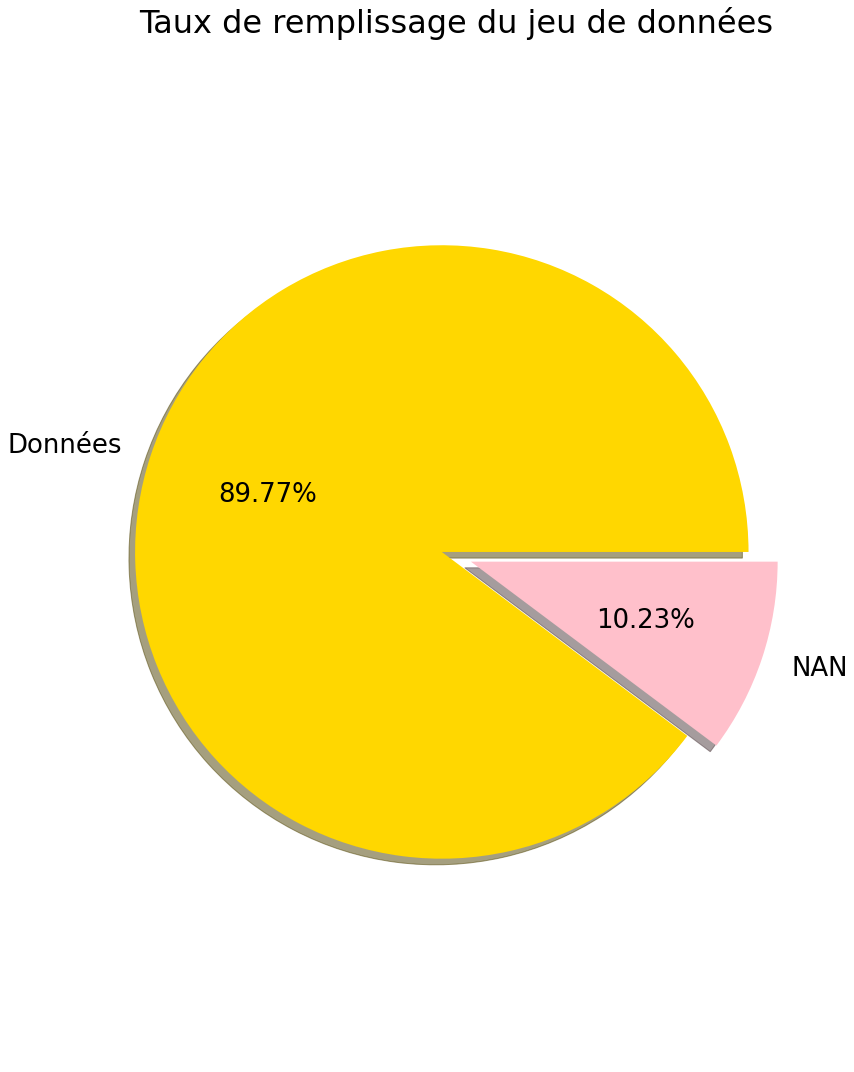

<Figure size 432x288 with 0 Axes>

In [61]:
# Représentation Graphique de cet Impact.
NaN_pie(clean_short)
plt.savefig('GRAPHS/graph_nettoyage/7- Taux_NaN3')
plt.show()

In [62]:
# La suppression des colonnes moins remplies fait passer le taux de données manquantes de 81,22% à 11,42%. 
# Pour nos analyses futures, il serait intéressant de voir s'il est possible de diminuer ce pourcentage pour avoir des variables totalement complètes. 
# Pour celà, il faudra imputer nos variables numériques.

In [63]:
# Visualisation des Premières ligne du Fichier Nettoyé.
clean_short.head()

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
106,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
182,5200016,lentilles vertes,plastique,autre,autre,autre,bio,France,france,autre,autre,autre,autre,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,carton,autre,autre,france,recyclable,France,france,arachides,E322/E322I,autre,autre,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,autre,autre,autre,france,autre,France,france,arachides,autre,autre,autre,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,verre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [64]:
# Imputation du nutriscore.
# Dimension du Fichier Nettoyé.
clean_short.shape

(53529, 27)

In [65]:
# Calcul du nutriscore s'il est NaN avec des composants de base ayant une valeur.
# Points négatifs : l'énergie, les graisses saturées, les sucres, et le sodium (des niveaux élevés sont considérés comme Nocifs pour la santé)
# Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).
# Le Rapport d'appui scientifique et technique de l'Anses (Agence Nationale de Sécurité Alimentaire) 
# relatif à l'Evaluation de la faisabilité du calcul d’un score nutritionnel tel qu’élaboré par Rayner et al.

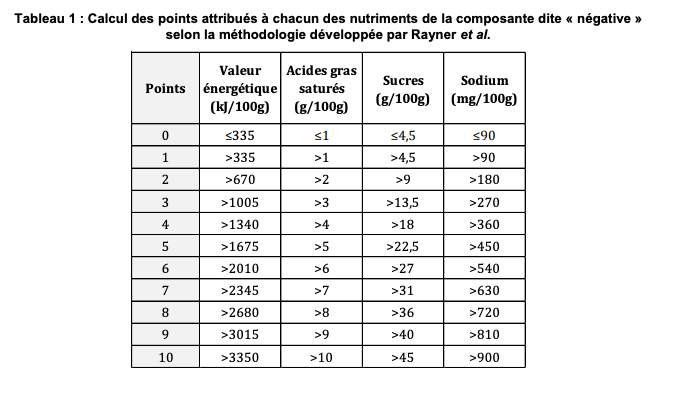

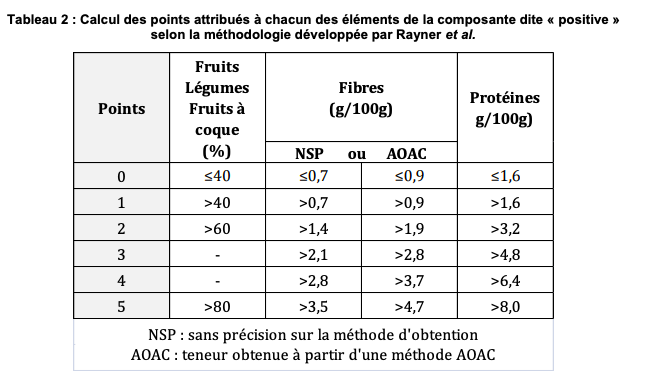

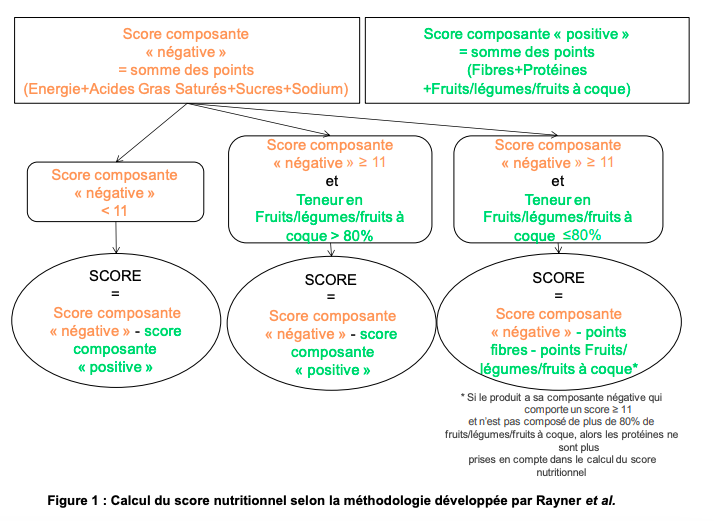

In [66]:
# Fonction qui Calcule le nutrition_score.
def nutri_calcul(row):
    """Fonction calculant le nutrition_score"""
    nutrition_score = 0    
    
    # Si toutes les valeurs sont NaN, calcul nutriscore impossible:
    x = np.isnan(row['sugars_100g'])
    y = np.isnan(row['energy_100g']) 
    z = np.isnan(row['saturated-fat_100g'])
    w = np.isnan(row['sodium_100g'])
    u = np.isnan(row['fiber_100g'])
    t = np.isnan(row['proteins_100g'])
    if (t & u & w & x & y & z):
    #if (t & u & w & x & z):
      return None

    # Calcul des points des composantes "négatives":

    x = row['energy_100g']
    energy=0
    if (x<=335):
        energy = 0
    elif (x>335) & (x<=670):
        energy = 1
    elif (x>670) & (x<=1005):
        energy = 2
    elif (x>1005) & (x<=1340):
        energy = 3
    elif (x>1340) & (x<=1675):
        energy = 4
    elif (x>1675) & (x<=2010):
        energy = 5
    elif (x>2010) & (x<=2345):
        energy = 6
    elif (x>2345) & (x<=2680):
        energy = 7
    elif (x>2680) & (x<=3015):
        energy = 8
    elif (x>3015) & (x<=3350):
        energy = 9
    elif (x>3350):
        energy = 10  


    x = row['saturated-fat_100g']
    saturees=0
    if (x<=1):
        saturees = 0
    elif (x>1) & (x<=2):
        saturees = 1
    elif (x>2) & (x<=3):
        saturees = 2
    elif (x>3) & (x<=4):
        saturees = 3
    elif (x>4) & (x<=5):
        saturees = 4
    elif (x>5) & (x<=6):
        saturees = 5
    elif (x>6) & (x<=7):
        saturees = 6
    elif (x>7) & (x<=8):
        saturees = 7
    elif (x>8) & (x<=9):
        saturees = 8
    elif (x>9) & (x<=10):
        saturees = 9
    elif (x>10):
        saturees = 10 


    x = row['sugars_100g']
    sucres=0
    if (x<=4.5):
        sucres = 0
    elif (x>4.5) & (x<=9):
        sucres = 1
    elif (x>9) & (x<=13.5):
        sucres = 2
    elif (x>13.5) & (x<=18):
        sucres = 3
    elif (x>18) & (x<=22.5):
        sucres = 4
    elif (x>22.5) & (x<=27):
        sucres = 5
    elif (x>27) & (x<=31):
        sucres = 6
    elif (x>31) & (x<=36):
        sucres = 7
    elif (x>36) & (x<=40):
        sucres = 8
    elif (x>40) & (x<=45):
        sucres = 9
    elif (x>45):
        sucres = 10   

    x = row['sodium_100g']
    sodium=0
    if (x<=0.09):
        sodium = 0
    elif (x>0.09) & (x<=0.18):
        sodium = 1
    elif (x>0.18) & (x<=0.27):
        sodium = 2
    elif (x>0.27) & (x<=0.36):
        sodium = 3
    elif (x>0.36) & (x<=0.45):
        sodium = 4
    elif (x>0.45) & (x<=0.54):
        sodium = 5
    elif (x>0.54) & (x<=0.63):
        sodium = 6
    elif (x>0.63) & (x<=0.72):
        sodium = 7
    elif (x>0.72) & (x<=0.81):
        sodium = 8
    elif (x>0.81) & (x<=0.9):
        sodium = 9
    elif (x>0.9):
        sodium = 10  

    #Somme des composantes négatives pour le nutriscore    
    #negatives = energy + saturees + sucres + sodium   
    negatives = energy + saturees + sucres + sodium 
    #negatives = saturees + sucres + sodium 
    


    # Calcul des points des composantes "positives":
    x = row['fiber_100g']
    fibre=0
    if (x<=0.7):
        fibre = 0
    elif (x>0.7) & (x<=1.4):
        fibre = 1
    elif (x>1.4) & (x<=2.1):
        fibre = 2
    elif (x>2.1) & (x<=2.8):
        fibre = 3
    elif (x>2.8) & (x<=3.5):
        fibre = 4
    elif (x>3.5):
        fibre = 5   
            
    x = row['proteins_100g']
    proteines=0
    if (x<=1.6):
        proteines = 0
    elif (x>1.6) & (x<=3.2):
        proteines = 1
    elif (x>3.2) & (x<=4.8):
        proteines = 2
    elif (x>4.8) & (x<=6.4):
        proteines = 3
    elif (x>6.4) & (x<=8):
        proteines = 4
    elif (x>8):
        proteines = 5        
    
    positives = fibre + proteines
    
    #Calcul du nutrition_score:     
    nutrition_score = negatives - positives
        
    return nutrition_score

In [67]:
# Fonction qui impute le nutrtion_score.
def impute_nutrition_score (dataframe):
  orig = dataframe['nutrition-score-fr_100g'].isna().sum()
  # i: dataframe index; row: chaque ligne (row) au format series
  for i, row in dataframe[dataframe['nutrition-score-fr_100g'].isnull()].iterrows():  
    nutri=nutri_calcul(row)
    dataframe.loc[i,'nutrition-score-fr_100g']=nutri
  print('Nombre de lignes corrigées: ', orig-dataframe['nutrition-score-fr_100g'].isna().sum())

In [68]:
# Séparation du Dataset en sous-Dataset pour faciliter le calcul.
df_split= np.array_split(clean_short, 8)
df1=df_split[0]
df2=df_split[1]
df3=df_split[2]
df4=df_split[3]
df5=df_split[4]
df6=df_split[5]
df7=df_split[6]
df8=df_split[7]

In [69]:
# Imputation du sous-dataset1.
impute_nutrition_score(df1)

Nombre de lignes corrigées:  1407


In [70]:
# Imputation du sous-dataset2.
impute_nutrition_score(df2)

Nombre de lignes corrigées:  1181


In [71]:
# Imputation du sous-dataset3.
impute_nutrition_score(df3)

Nombre de lignes corrigées:  1320


In [72]:
# Imputation du sous-dataset4.
impute_nutrition_score(df4)

Nombre de lignes corrigées:  1545


In [73]:
# Imputation du sous-dataset5.
impute_nutrition_score(df5)

Nombre de lignes corrigées:  1150


In [74]:
# Imputation du sous-dataset6.
impute_nutrition_score(df6)

Nombre de lignes corrigées:  1468


In [75]:
# Imputation du sous-dataset7.
impute_nutrition_score(df7)

Nombre de lignes corrigées:  1115


In [76]:
# Imputation du sous-dataset8.
impute_nutrition_score(df8)

Nombre de lignes corrigées:  1213


In [77]:
# Nombre total de nutrition_score imputés :
1407 + 1181 + 1320 + 1545 + 1150 + 1468 + 1115 + 1213

10399

In [78]:
# Grâce à cette méthode, il a été possible d'imputer et compléter 10399 nutriscores.
# Concaténation des sous datasets après imputation.

In [79]:
# Rassemblement des sous-datasets.
df_frames = [df1, df2, df3, df4, df5, df6, df7, df8]
# Concaténation du dataset rassemblé.
data_cleaning = pd.concat(df_frames)
# Visualisation da dataset.
data_cleaning

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
106,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
182,5200016,lentilles vertes,plastique,autre,autre,autre,bio,France,france,autre,autre,autre,autre,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
184,7730009,Biscuits sablés fourrage au cacao,carton,autre,autre,france,recyclable,France,france,arachides,E322/E322I,autre,autre,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
188,10090206,Thé de Noël aromatisé orange-cannelle,autre,autre,autre,france,autre,France,france,arachides,autre,autre,autre,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
189,10127735,Sirops pour ganache macarons,verre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320743,9791463741241,Gingembre,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320753,9871311007,Lager,verre,autre,autre,autre,recyclable,NaN,autre,autre,autre,autre,autre,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320758,9900010011557,Miel de Camargue,verre,autre,france,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
320763,99111250,Thé vert Earl grey,carton,autre,autre,autre,bio,France,france,autre,autre,autre,autre,2.0,c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,0


In [80]:
# vérifions que la taille soit identique avant et après imputation.
data_cleaning.shape

(53529, 27)

In [81]:
# OK, pas de perte de ligne.

In [82]:
#################################### 
#Traitement des données aberrantes.#
####################################

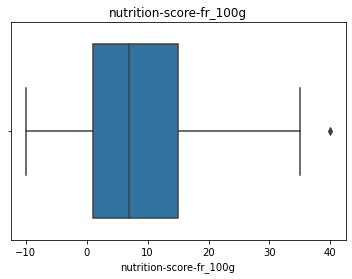

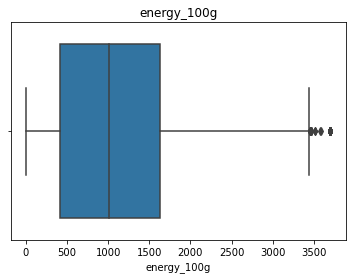

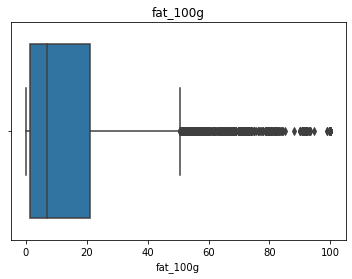

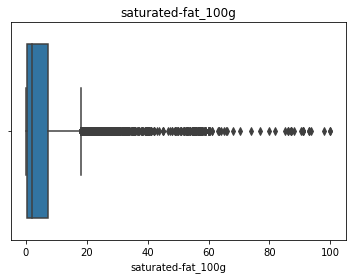

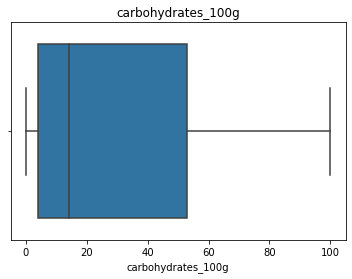

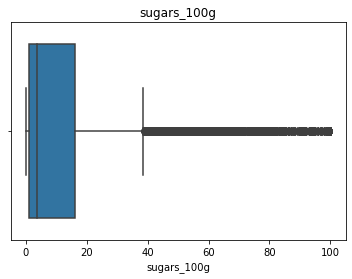

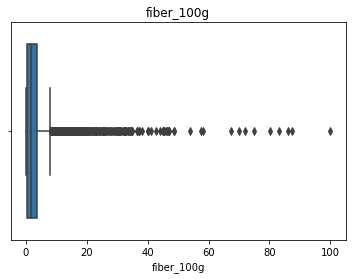

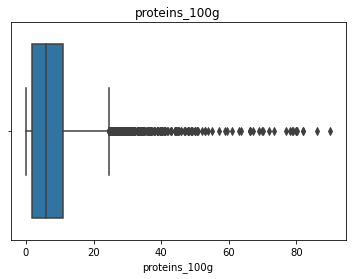

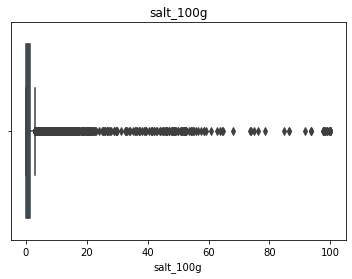

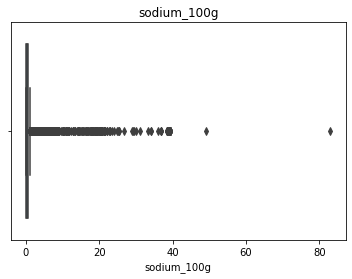

In [85]:
# Création des boîtes à moustache pour détecter les anomalies des variables quantitatives
for var in data_cleaning.columns:
    if data_cleaning[var].dtypes == 'float64':
        sns.boxplot(x=var, data=data_cleaning)
        plt.title(var)
        plt.savefig('GRAPHS/graph_nettoyage/8- Boxplot')
        plt.show()

In [84]:
# Les valeurs nutritionnelles sont pour 100 gr et ne peuvent pas dépasser 100 gr.
# Par conséquent, nous supprimerons les lignes avec des valeurs supérieures à 100 g pour les glucides, le sucre, les fibres, les protéines et le sel. Nous supprimerons également les lignes avec des valeurs inférieures à 0.
# Les aliments les plus caloriques peuvent contenir jusqu'à 900 calories. Par conséquent, en ce qui concerne l'énergie en kcal, nous supprimerons les lignes avec des valeurs supérieures à 900 kcal et inférieures à 0.

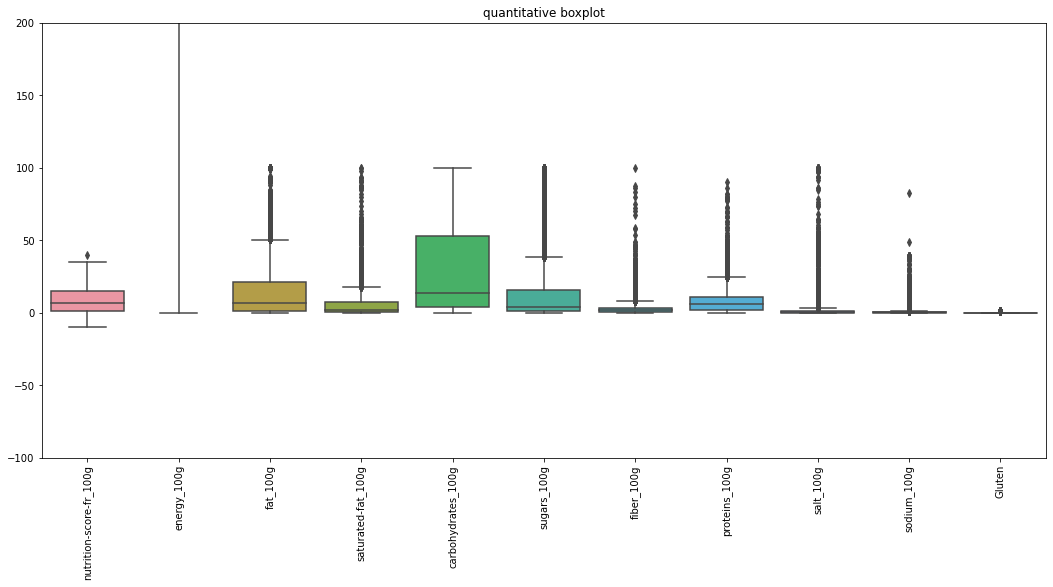

In [86]:
# Représentation graphique des variables quantitatives.
degrees = 90
fig = plt.figure(figsize=(18, 8))
ax = plt.axes()
plt.xticks(rotation=degrees)
ax.set_ylim([-1e2,2e2])
sns.boxplot(data=data_cleaning).set_title('quantitative boxplot');
plt.savefig('GRAPHS/graph_nettoyage/9- Boxplot2')
plt.show()

In [87]:
# Statistiques descriptives des variables quantitatives.
data_cleaning.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
count,44076.000000,43762.000000,43285.000000,41826.000000,42905.000000,41938.000000,26713.000000,43613.000000,41976.000000,41976.000000,53529.000000
mean,8.273482,1089.111702,13.237904,5.299015,27.507363,12.869611,2.745558,7.722998,1.117967,0.443294,0.065572
std,8.684773,760.050362,16.700416,8.017134,27.388419,18.621185,3.980577,7.453301,3.936464,1.618912,0.247535
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,416.000000,1.300000,0.300000,4.000000,1.000000,0.500000,1.900000,0.080000,0.031496,0.000000
50%,7.000000,1008.000000,6.800000,1.970000,14.000000,3.800000,1.800000,6.000000,0.600000,0.236220,0.000000
75%,15.000000,1627.000000,21.000000,7.400000,53.000000,16.000000,3.500000,11.000000,1.270000,0.500000,0.000000
max,40.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,100.000000,83.000000,1.000000


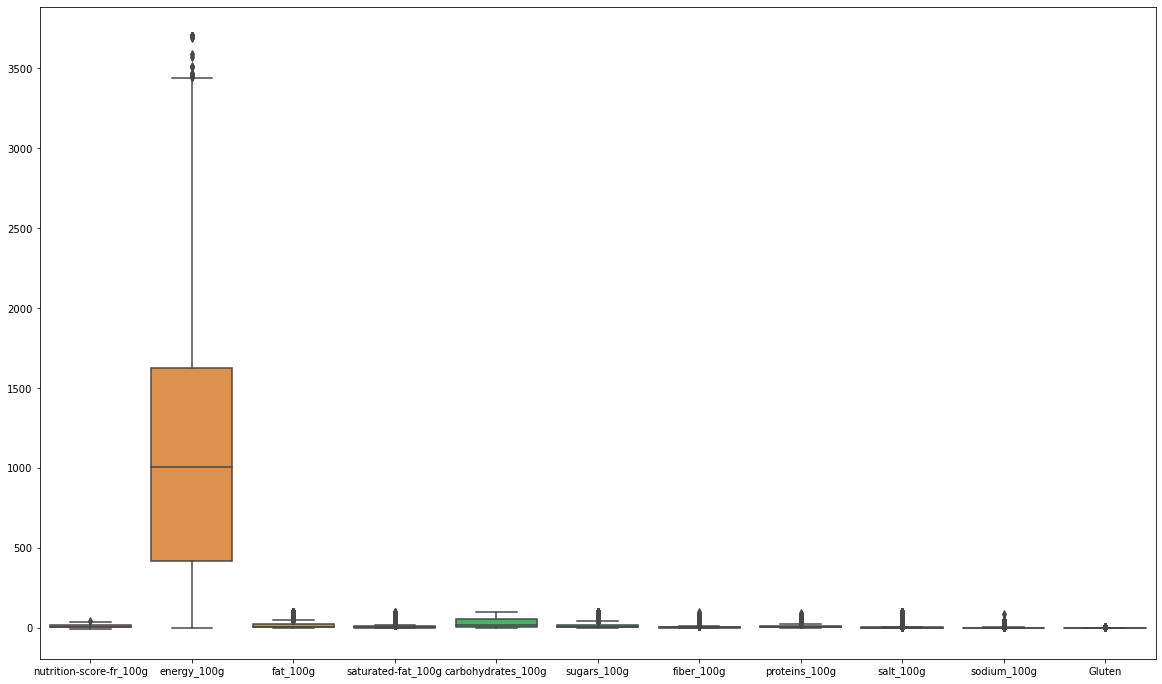

In [89]:
# Boxplot des variables quantitatives.
plt.figure(figsize=(20,12));
sns.boxplot(data = data_cleaning)
plt.savefig('GRAPHS/graph_nettoyage/10- Boxplot3')
plt.show()

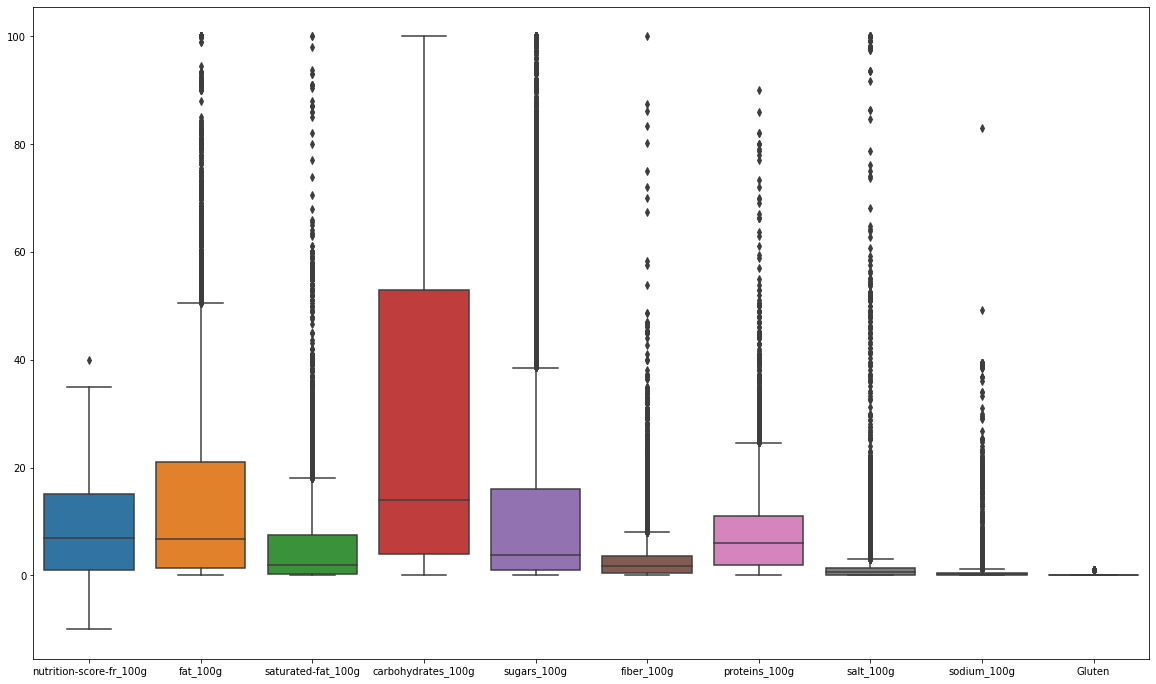

In [90]:
# La variable quantitative Energy_100g ayant une unité différente des autres, nous la supprimons pour voir l'impact des autres variables quantitatives.
plt.subplots(figsize=(20,12))
sns.boxplot(data=data_cleaning.drop('energy_100g', axis=1))
plt.savefig('GRAPHS/graph_nettoyage/11- Boxplot4')
plt.show()

In [91]:
# Supression des outliers : diverses méthodes.
# Une valeur aberrante est une observation qui diffère des autres observations.
# Il n'existe pas de moyen précis de définir et d'identifier les valeurs aberrantes en raison des 
# spécificités de chaque ensemble de données. Différentes méthodes statistiques permettent d'identifier 
# les observations qui semblent rares ou improbables compte tenu des données disponibles.

In [92]:
# Méthode d'écart-type
# La première méthode est d'utiliser l'écart type.
# Standard 3 deviation
def remove_3deviation(df_in, n):
  indexes_outliers = [] 
  #Itération sur les colonnes contenant des valeurs numériques.  
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist(): 
    print('colonne ', col_name)
    upper_limit = df_in[col_name].mean() + 3*df_in[col_name].std()
    #print(upper_limit)
    lower_limit = df_in[col_name].mean() -3*df_in[col_name].std()
    #print(lower_limit)
    list_outliers = df_in[(df_in[col_name]>upper_limit) | (df_in[col_name]<lower_limit)].index
    print("Now remove these outliers and generate new dataframe")
    # Ajout des index des outliers trouvés à la liste dejà crée.
    indexes_outliers.extend(list_outliers) 
    
  # Conteneur qui garde en mémoire le nombre de fois qu'est ajoutée chaque observation.  
  indexes_outliers = Counter(indexes_outliers)  
  # Sélection des observation qui apparaissent plus de n fois.  
  multiple_outliers = list( k for k, v in indexes_outliers.items() if v > n )  
  #print(multiple_outliers)
  #print("Remove outlier")
  df_no_outlier12 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  return df_no_outlier12

In [93]:
# Application de l'Application.
df_out_remove_3deviation = remove_3deviation(data_cleaning, 1)

colonne  nutrition-score-fr_100g
Now remove these outliers and generate new dataframe
colonne  energy_100g
Now remove these outliers and generate new dataframe
colonne  fat_100g
Now remove these outliers and generate new dataframe
colonne  saturated-fat_100g
Now remove these outliers and generate new dataframe
colonne  carbohydrates_100g
Now remove these outliers and generate new dataframe
colonne  sugars_100g
Now remove these outliers and generate new dataframe
colonne  fiber_100g
Now remove these outliers and generate new dataframe
colonne  proteins_100g
Now remove these outliers and generate new dataframe
colonne  salt_100g
Now remove these outliers and generate new dataframe
colonne  sodium_100g
Now remove these outliers and generate new dataframe
colonne  Gluten
Now remove these outliers and generate new dataframe


In [94]:
# Dimension du dataset
df_out_remove_3deviation.shape

(52626, 27)

In [95]:
# Avec cette méthode, il y a 903 outliers supprimés.
53529 - 52626

903

In [97]:
# La deuxième méthode est d'utiliser Z-score.
# Z-score.
data_cleaning.shape

(53529, 27)

In [98]:
# Fonction qui détecte et supprime les outliers.
def remove_zscore(df_in, n):
  indexes = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist():
    if col_name != 'zscore':
      print('colonne ', col_name)
      df_in['zscore'] = ( df_in[col_name] - df_in[col_name].mean() ) / df_in[col_name].std()
      df_in[df_in['zscore']>3]
      df_in[df_in['zscore']<-3]

      list_outliers = df_in[(df_in.zscore<-3) | (df_in.zscore>3)].index 
      indexes.extend(list_outliers)
    else:
      break

  indexes = Counter(indexes)
  multiple_outliers = list( k for k, v in indexes.items() if v > n ) 
  df_no_outliers3 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  df_in = df_in.drop(columns=['zscore'], inplace=True)
  df_no_outliers3 = df_no_outliers3.drop(columns=['zscore'])

  return df_no_outliers3

In [99]:
# Application de la Fonction.
df_out_remove_zscore = remove_zscore(data_cleaning, 1)

colonne  nutrition-score-fr_100g
colonne  energy_100g
colonne  fat_100g
colonne  saturated-fat_100g
colonne  carbohydrates_100g
colonne  sugars_100g
colonne  fiber_100g
colonne  proteins_100g
colonne  salt_100g
colonne  sodium_100g
colonne  Gluten


In [101]:
df_out_remove_zscore.shape

(52626, 27)

In [102]:
# Avec cette méthode, il y a 903 outliers supprimés.
53529 - 52626

903

In [103]:
# Peut-on se fier à ces méthodes ? (Non)
# La condition principale et essentielle pour l'utilisation de ces deux méthodes est le fait que nos variables doivent suivre une distribution gaussienne (loi Normale).
# Standard 3 deviation : La distribution gaussienne a pour propriété que l'écart-type par rapport à la moyenne peut être utilisé pour résumer de manière fiable le pourcentage de valeurs dans l'échantillon. Trois écarts-types par rapport à la moyenne sont un seuil commun dans la pratique pour identifier les valeurs aberrantes dans une distribution gaussienne.
# Z-score : Il indique l'écart type d'un échantillon donné. Ce score aide à déterminer si une valeur est plus grande ou plus petite que la moyenne de la variable et de combien la valeur est éloignée de la moyenne. Plus précisément, le Z-score nous dit de combien de standard déviation la valeur est éloignée de la moyenne.
# Z score = (x-mean) / std.deviation
# Si le Z-score d'une valeur est supérieur à 3, cela indique que le point de données est très différent des autres points de données et cette valeur peut être considérée comme abhérante.

In [104]:
# Vérifions si nos données suivent une distribution normale

def verif_normalite (dataframe):
  numeric_columns = dataframe.select_dtypes(include = ['int64','float64']).columns
  numeric_columns = numeric_columns[1:]
  for column in numeric_columns:
      print('__\n{}'.format(column))
      k2, p = stats.normaltest(data_cleaning[column], 
                               axis=0,
                               nan_policy = 'omit')
      alpha = 5e-2
      print("p = {:g}".format(p))
      if p < alpha:  # null hypothese: x a une distribution normale
          print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
      else:
          print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

In [105]:
# Application de la Fonction.
gauss = verif_normalite(data_cleaning)

__
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
__
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
__
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
__
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
__
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
__
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'est pas de distribution normale
__
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
__
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
__
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale
__
Gluten
p = 0
H0 est rejetée : Gluten n'est pas de distribution normale


In [106]:
# Aucune de nos variables ne suit une distribution normale. On ne peut donc pas se fier aux méthodes 
# de l'écart-type qui ne sont pas adéquates à nos données. Nous devons donc choisir une autre méthode 
# fiable quelque soit la loi suivie par nos données.

In [107]:
# Méthode de plage interquartile.
data_cleaning.shape

(53529, 27)

In [108]:
# Toutes les données ne suivent pas une distribution normale. Une bonne statistique pour résumer 
# un échantillon de données de distribution non gaussienne est la plage interquartile (IQR). 
# L'IQR est calculée comme la différence entre le 75e et le 25e percentile des données (Q3-Q1) et 
# définit la boîte dans un graphique en boîte à moustaches. A partir de ces percentiles, une limite 
# supérieure et une limite inférieure sont définies, les valeurs plus grandes ou plus petites à ces 
# limites sont considérées comme outlier.

In [109]:
"""Prend en paramètre un dataset et renvoie une liste des indices correspondant aux observations contenant plus de n valeurs aberrantes ainsi qu'un jeu de données sans donnée abhérante"""
def remove_IQR(df_in, n):
  indexes_outliers = [] 
  for col_name in df_in.select_dtypes(include = ['int64','float64']).columns.tolist(): #itération sur les colonnes contenant des valeurs numériques
    print('colonne ', col_name)
    Q1 = df_in[col_name].quantile(0.25) # 1st quartile (25%)
    Q3 = df_in[col_name].quantile(0.75) # 3rd quartile (75%)
    # L'IQR peut ensuite être calculé comme la différence entre le 75e et le 25e percentile : Interquartile range (IQR)
    IQR = Q3 - Q1 
    # Outlier step : calculer le seuil pour les valeurs aberrantes comme 1,5 fois l'IQR et soustraire ce seuil du 25e percentile et l'ajouter au 75e percentile pour donner les limites réelles des données.
    lower_limit = Q1 - 1.5*IQR 
    upper_limit = Q3 + 1.5*IQR
    # Utiliser ces limites pour identifier les valeurs aberrantes.
    lower_limit, upper_limit 
     # Determine a list of indices of outliers for feature col
    list_outliers = df_in[(df_in[col_name]<lower_limit)|(df_in[col_name]>upper_limit)].index
    # append the found outlier indices for col to the list of outlier indices
    indexes_outliers.extend(list_outliers) 
   # Is a container that keeps track of how many times equivalent values are added
  indexes_outliers = Counter(indexes_outliers)  
  # Select observations containing more than n outliers
  multiple_outliers = list( k for k, v in indexes_outliers.items() if v > n )  
  print(" ")
  print("remove {} outliers" .format(len(multiple_outliers)))
  df_no_outlier1 = df_in.drop(multiple_outliers, axis = 0, inplace=False).reset_index(drop=True) 
  return df_no_outlier1

In [110]:
# Application de la Fonction.
df_out_remove_IQR = remove_IQR(data_cleaning, 1)

colonne  nutrition-score-fr_100g
colonne  energy_100g
colonne  fat_100g
colonne  saturated-fat_100g
colonne  carbohydrates_100g
colonne  sugars_100g
colonne  fiber_100g
colonne  proteins_100g
colonne  salt_100g
colonne  sodium_100g
colonne  Gluten
 
remove 4510 outliers


In [111]:
# Avec la méthode IQR, 4510 sont outliers supprimés.

In [112]:
# Staistiques Descriptiques.
df_out_remove_IQR.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
count,39566.000000,39275.000000,38889.000000,37372.000000,38550.000000,37514.000000,24220.000000,39127.000000,37523.00000,37523.000000,49019.000000
mean,7.359349,1010.497106,11.086204,4.160891,28.190868,12.705555,2.488418,7.150303,0.71312,0.284278,0.064832
std,8.343796,707.668254,13.787415,5.726343,27.589664,18.411279,3.546217,6.668212,0.71296,0.570037,0.246232
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,381.000000,1.000000,0.200000,4.600000,1.100000,0.500000,1.700000,0.08000,0.031496,0.000000
50%,5.000000,916.000000,5.500000,1.600000,14.900000,4.000000,1.700000,5.800000,0.56134,0.221000,0.000000
75%,14.000000,1549.000000,18.000000,5.800000,54.000000,15.800000,3.300000,10.200000,1.19000,0.468504,0.000000
max,35.000000,3700.000000,100.000000,98.000000,100.000000,100.000000,100.000000,86.000000,3.05000,83.000000,1.000000


In [113]:
# Visualisation du dataset.
df_out_remove_IQR

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
0,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,0
1,5200016,lentilles vertes,plastique,autre,autre,autre,bio,France,france,autre,autre,autre,autre,NaN,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7730009,Biscuits sablés fourrage au cacao,carton,autre,autre,france,recyclable,France,france,arachides,E322/E322I,autre,autre,NaN,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10090206,Thé de Noël aromatisé orange-cannelle,autre,autre,autre,france,autre,France,france,arachides,autre,autre,autre,NaN,NaN,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10127735,Sirops pour ganache macarons,verre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49014,9791463741241,Gingembre,autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
49015,9871311007,Lager,verre,autre,autre,autre,recyclable,NaN,autre,autre,autre,autre,autre,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
49016,9900010011557,Miel de Camargue,verre,autre,france,autre,autre,France,france,autre,autre,autre,autre,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
49017,99111250,Thé vert Earl grey,carton,autre,autre,autre,bio,France,france,autre,autre,autre,autre,2.0,c,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,0


In [114]:
# Avec la méthode la plus adaptée au jeu de données à notre disposition, il y a 4510 outliers qui ont été supprimés. Au final le jeu de données est composé de 42271 lignes et 27 colonnes (à l'origine 320772 lignes et 162 colonnes) et contient tous les produits vendus en France sans les colonnes non essentielles à l'étude et celles avec peu de données.
# En regardant les mesures statistiques de notre dataset final, on peut dire que tout les outliers ont été supprimés car le minimum de chaque variable (sauf 'nutrition-score-fr_100g' et 'energy_100g') n'est pas inférieur à 0 ni supérieur à 100.

In [115]:
# Supprimer les valeurs manquantes des variables suivantes.
df_out_remove_IQR.dropna(subset=['countries','pnns_groups_1','pnns_groups_2','nutrition_grade_fr'], inplace=True)
df_out_remove_IQR.isna().sum()

code                                              0
product_name                                      0
packaging_tags                                    0
brands_tags                                       0
origins_tags                                      0
manufacturing_places_tags                         0
labels_tags                                       0
countries                                         0
countries_tags                                    0
traces_tags                                       0
additives_tags                                    0
ingredients_from_palm_oil_tags                    0
ingredients_that_may_be_from_palm_oil_tags        0
nutrition-score-fr_100g                           3
nutrition_grade_fr                                0
pnns_groups_1                                     0
pnns_groups_2                                     0
energy_100g                                     105
fat_100g                                        689
saturated-fa

In [116]:
# Imputation des valeurs numériques NaN.
# Essai d'Imputation par la méthode des K voisins (KNN) sur un sous-dataset.
# Echantillon extrait du dataset.
#cleaned_short_extract = df_out_remove_IQR.select_dtypes(['int64','float64']).head(20000)
cleaned_short_extract = df_out_remove_IQR.select_dtypes(['int64','float64'])
# Visualisation du dataset extrait.
cleaned_short_extract

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
0,22.0,1883.0,20.0,12.50,70.00,57.50,2.500,2.500,0.09652,0.038000,0
5,13.0,177.0,0.0,0.00,10.40,10.40,0.000,0.000,0.02540,0.010000,0
6,13.0,177.0,0.0,0.00,10.40,10.40,NaN,0.000,0.10000,0.039370,0
7,12.0,1900.0,23.0,2.50,55.00,26.00,1.500,6.000,0.66000,0.259843,0
8,13.0,1768.0,19.0,2.50,56.00,28.00,1.800,5.800,0.65000,0.255906,0
...,...,...,...,...,...,...,...,...,...,...,...
49008,10.0,1309.0,15.0,9.00,41.40,5.10,6.500,6.000,0.90000,0.354331,0
49009,4.0,192.0,0.5,0.00,10.20,9.20,0.600,0.600,0.03000,0.011811,0
49010,4.0,1017.0,1.3,1.28,95.87,0.12,0.005,0.040,0.00500,0.001969,0
49012,2.0,1031.0,1.3,1.28,95.31,0.10,1.470,0.004,0.00100,0.000394,0


In [117]:
# Données manquantes de l'échantillon du dataset.
cleaned_short_extract.isna().sum()

nutrition-score-fr_100g        3
energy_100g                  105
fat_100g                     689
saturated-fat_100g            65
carbohydrates_100g           703
sugars_100g                   67
fiber_100g                 13115
proteins_100g                 65
salt_100g                     67
sodium_100g                   65
Gluten                         0
dtype: int64

Le jeux de données est rempli à 96.29%
et il a 3.71% de données manquantes
 
 


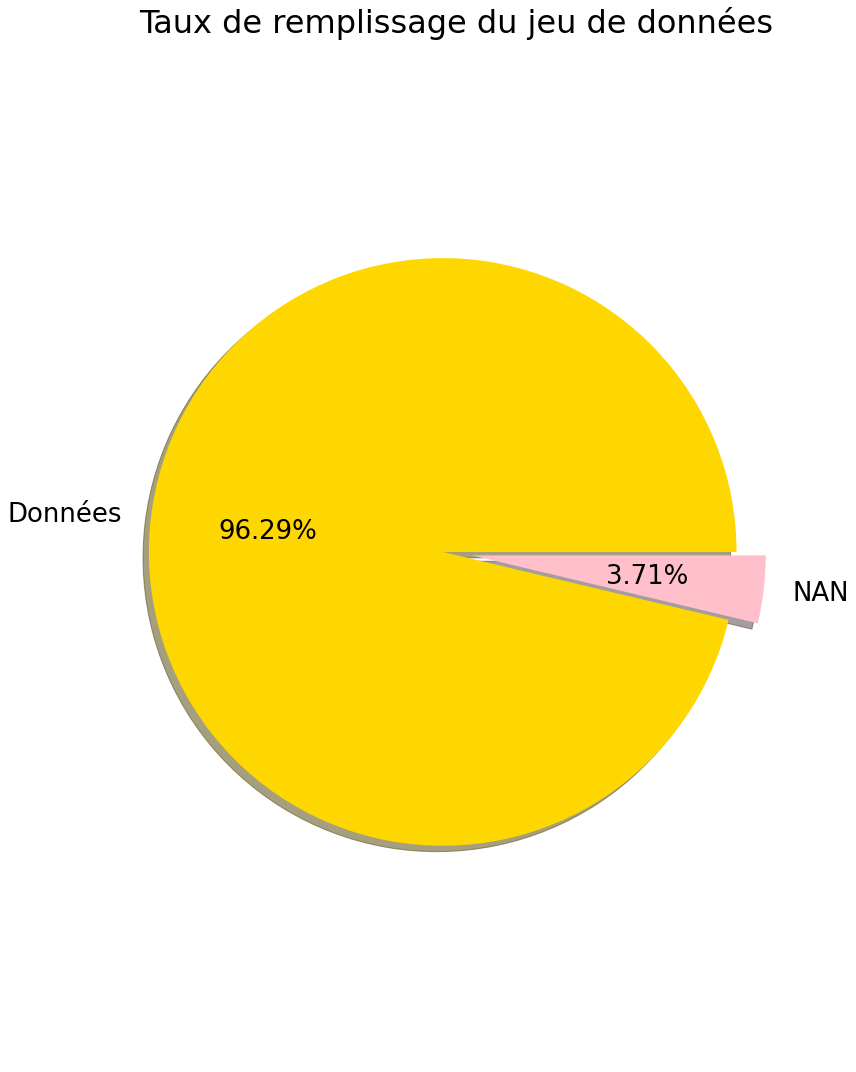

<Figure size 432x288 with 0 Axes>

In [118]:
# Représentation graphique du taux de remplissage.
NaN_pie(cleaned_short_extract)
plt.savefig('GRAPHS/graph_nettoyage/12- Taux_NaN4')
plt.show()

In [119]:
# Dans notre dataset, il y a 3,71% de données manquantes. Voyons si la méthode d'imputation des k voisins permet de diminuer ce taux.
# Choix du nombre de K voisins grâce à la fonction optimize_k qui calcule pour chaque voisin le RMSE (c’est la racine carrée de la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations, qui est à minimiser).
# La cellule cible choisie est proteine_100g car il s'agit de la variable avec le moins de données manquantes.

In [120]:
# Fonction RMSE.
def rmse(predictions, targets):

    differences = predictions - targets                       

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)          

    return rmse_val

In [121]:
# Fonction OPTIMIZE K.
def optimize_k(data, target):
    errors = []
    for k in range(1, 26, 2):
        print(k)
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        #error = rmse(y_test, preds)
        error = mean_squared_error(y_test, preds, squared=False)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [122]:
# Application des Fonctions précédentes.
k_errors = optimize_k(data=cleaned_short_extract, target='proteins_100g')
# Visualisation.
k_errors

1
3
5
7
9
11
13
15
17
19
21
23
25


[{'K': 1, 'RMSE': 2.0150672073006692},
 {'K': 3, 'RMSE': 2.060519758259728},
 {'K': 5, 'RMSE': 2.0494450755049014},
 {'K': 7, 'RMSE': 2.078383194955169},
 {'K': 9, 'RMSE': 2.0477340516891114},
 {'K': 11, 'RMSE': 2.0244622816367053},
 {'K': 13, 'RMSE': 2.072540345257888},
 {'K': 15, 'RMSE': 2.0476558595303667},
 {'K': 17, 'RMSE': 2.0696092985733183},
 {'K': 19, 'RMSE': 2.0617739237832304},
 {'K': 21, 'RMSE': 2.0800532356837445},
 {'K': 23, 'RMSE': 2.0916202004527915},
 {'K': 25, 'RMSE': 2.0638657585158384}]

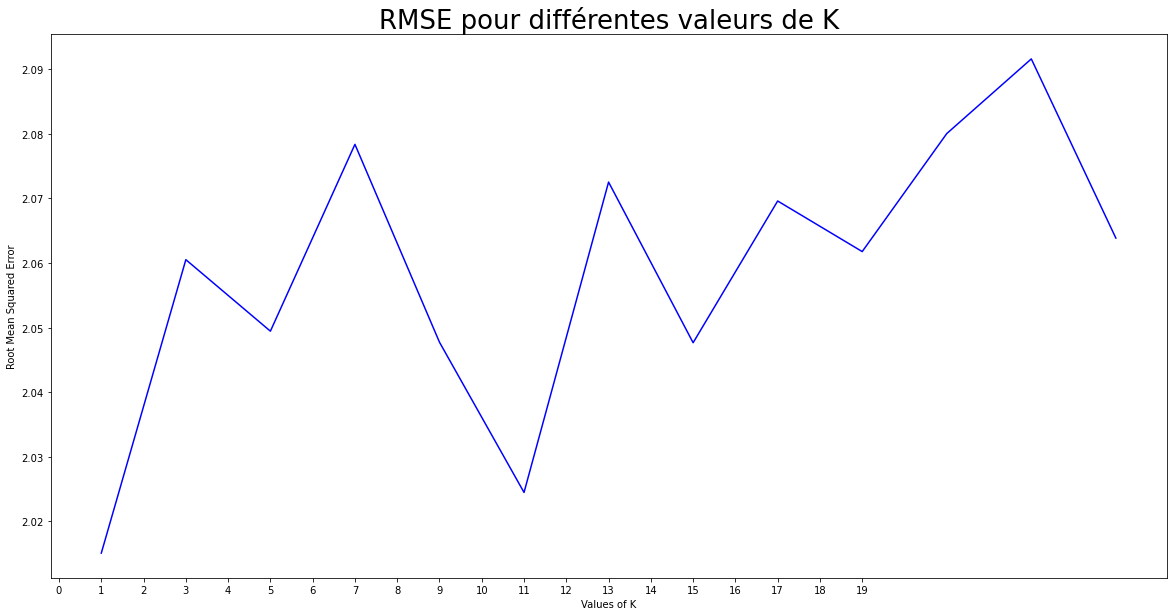

In [123]:
# Représentation graphique des différentes valeurs de K.
df = pd.DataFrame(k_errors)
plt.figure(figsize = (20,10))
plt.plot(df['K'], df['RMSE'], 'b-')
plt.title("RMSE pour différentes valeurs de K", fontsize = 26) 
plt.xlabel('Values of K')
plt.ylabel('Root Mean Squared Error')
plt.xticks(np.arange(0, 20, 1))
plt.savefig('GRAPHS/graph_nettoyage/13- K_RMSE')
plt.show()

In [124]:
# Grâce à ce graphique, il est possible de dire que le nombre de voisins à choisir pour l'imputation est 11.

In [125]:
def impute_KNN(dataframe, k):
    df = dataframe.select_dtypes(['int64','float64'])
    imputer = KNNImputer(n_neighbors=k)
    imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(imputed, columns=df.columns)
    return df_imputed

In [126]:
# Application de la Fonction.
cleaned_short_impute = impute_KNN(cleaned_short_extract, 11)
# Visualisation
cleaned_short_impute.head()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
0,22.0,1883.0,20.0,12.5,70.0,57.5,2.500000,2.5,0.09652,0.038000,0.0
1,13.0,177.0,0.0,0.0,10.4,10.4,0.000000,0.0,0.02540,0.010000,0.0
2,13.0,177.0,0.0,0.0,10.4,10.4,0.009091,0.0,0.10000,0.039370,0.0
3,12.0,1900.0,23.0,2.5,55.0,26.0,1.500000,6.0,0.66000,0.259843,0.0
4,13.0,1768.0,19.0,2.5,56.0,28.0,1.800000,5.8,0.65000,0.255906,0.0


Le jeux de données est rempli à 100.00%
et il a 0.00% de données manquantes
 
 


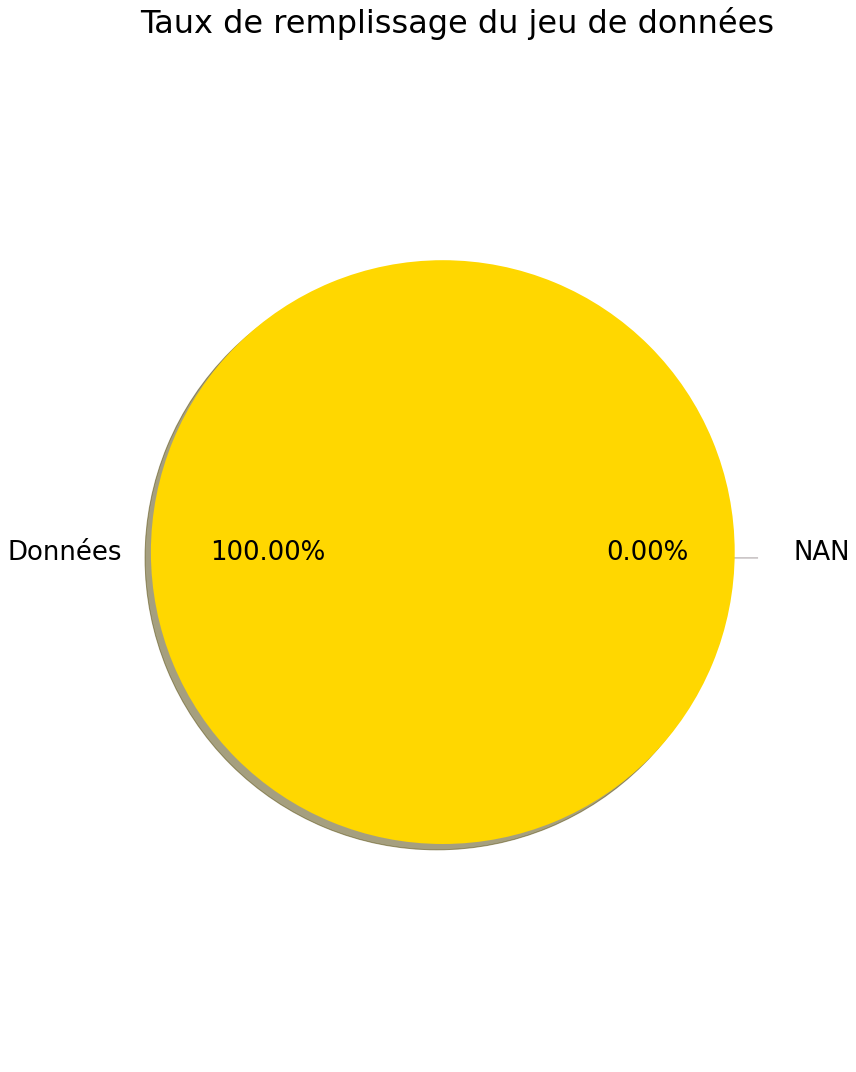

<Figure size 432x288 with 0 Axes>

In [127]:
# Représentation graphique du taux de remplissage.
NaN_pie(cleaned_short_impute)
plt.savefig('GRAPHS/graph_nettoyage/14- Taux_NaN5')
plt.show()

In [128]:
# Après l'imputation par la méthode KNN, il n'y a plus de données manquantes pour les variables quantitatives.
cleaned_short_impute.isna().sum()

nutrition-score-fr_100g    0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
Gluten                     0
dtype: int64

In [129]:
# Pour éviter tout problème de performance, nous continuerons nos analyses, par l'imputation des NaN avec la fonction interpolate de pandas.
# Imputation par la méthode interpolate de pandas.

In [130]:
# Imputation avec pandas.
def imputation_pandas(dataframe):
  cleaned_short_impute = dataframe.copy()
  for col_name in dataframe.select_dtypes(include = ['int64','float64']).columns.tolist():
  #for col_name in dataframe.select_dtypes(include = ['int64','float64']).columns.tolist():  
    print(col_name)
    cleaned_short_impute[col_name] = dataframe[col_name].interpolate(method='linear', inplace=False, limit_direction="both").ffill().bfill()
  return cleaned_short_impute

In [131]:
# Application de la Fonction. nutrition_score = data_cleaning['nutrition_grade_fr']
cleaned_short_imputed = imputation_pandas(df_out_remove_IQR)
# Visualisation du DataFrame cleaned_short_imputed.
cleaned_short_imputed

nutrition-score-fr_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
Gluten


,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
0,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.50,70.00,57.50,2.500,2.500,0.09652,0.038000,0
5,40608754,"Pepsi, Nouveau goût !",autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.00,10.40,10.40,0.000,0.000,0.02540,0.010000,0
6,87177756,7Up,autre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.00,10.40,10.40,0.750,0.000,0.10000,0.039370,0
7,10,Madeleines nature,plastique,autre,autre,autre,autre,France,france,arachides,autre,autre,E471,12.0,d,Sugary snacks,Biscuits and cakes,1900.0,23.0,2.50,55.00,26.00,1.500,6.000,0.66000,0.259843,0
8,30,Cakes Raisins,plastique,autre,autre,france,recyclable,France,france,arachides,autre,autre,E471,13.0,d,Sugary snacks,Biscuits and cakes,1768.0,19.0,2.50,56.00,28.00,1.800,5.800,0.65000,0.255906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49008,9556587103869,Mini Paratha,carton,autre,autre,autre,sans conservateur,France,france,lait,autre,huile-de-palme,autre,10.0,c,Cereals and potatoes,Bread,1309.0,15.0,9.00,41.40,5.10,6.500,6.000,0.90000,0.354331,0
49009,9577283844672,100% Pur Jus 4 agrumes,plastique,cora,autre,autre,recyclable,France,france,autre,autre,autre,autre,4.0,c,Beverages,Fruit juices,192.0,0.5,0.00,10.20,9.20,0.600,0.600,0.03000,0.011811,0
49010,96068779,Spearmint sans sucres,plastique,autre,autre,autre,autre,France,france,autre,autre,autre,autre,4.0,c,Sugary snacks,Sweets,1017.0,1.3,1.28,95.87,0.12,0.005,0.040,0.00500,0.001969,0
49012,96118580,Fisherman's Friend Miel-Citron,plastique,autre,autre,autre,autre,France,france,autre,E330,autre,autre,2.0,b,Sugary snacks,Sweets,1031.0,1.3,1.28,95.31,0.10,1.470,0.004,0.00100,0.000394,0


  

Traitement de la variable  nutrition-score-fr_100g
Moyenne (Avant / Après) :  11.587324262549595  /  7.820168365812994
Ecart-Type (Avant / Après) :  7.783573027132666  /  8.385416954953063
  

Traitement de la variable  energy_100g
Moyenne (Avant / Après) :  1118.7480577165247  /  1019.6456507775973
Ecart-Type (Avant / Après) :  788.2700354067659  /  707.6010169007932
  

Traitement de la variable  fat_100g
Moyenne (Avant / Après) :  12.725255836650732  /  11.017019135211749
Ecart-Type (Avant / Après) :  17.503695302620336  /  13.589881023788736
  

Traitement de la variable  saturated-fat_100g
Moyenne (Avant / Après) :  5.125924521478911  /  4.173559224861382
Ecart-Type (Avant / Après) :  7.913684082473977  /  5.715235963679287
  

Traitement de la variable  carbohydrates_100g
Moyenne (Avant / Après) :  32.05532334615376  /  28.395463495230253
Ecart-Type (Avant / Après) :  29.14068039159681  /  27.418835786004156
  

Traitement de la variable  sugars_100g
Moyenne (Avant / Après) :

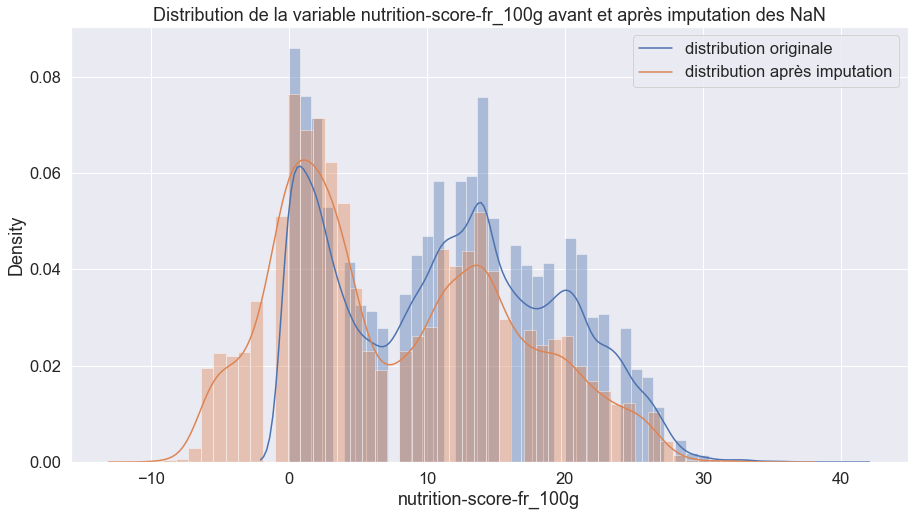

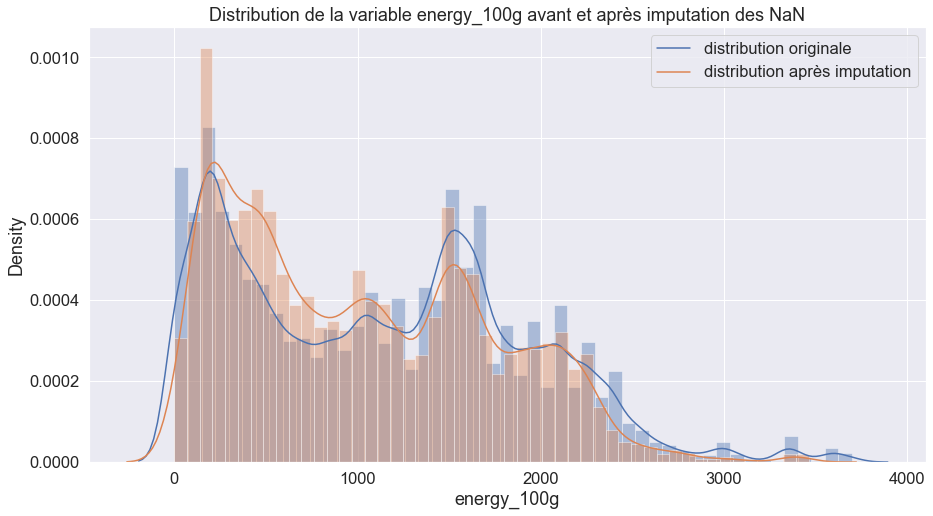

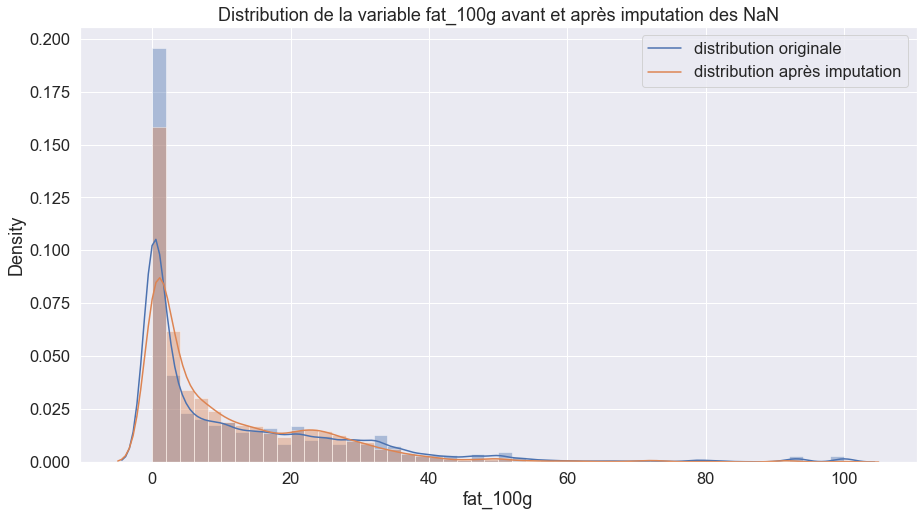

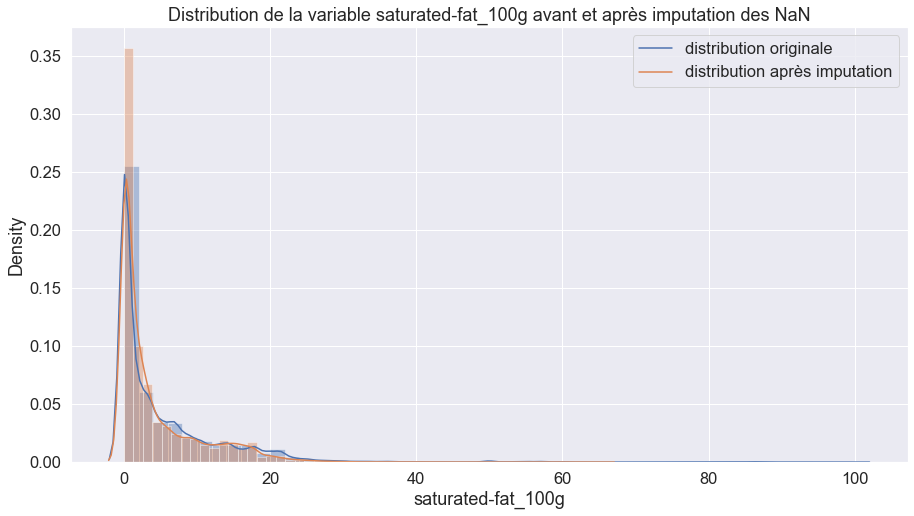

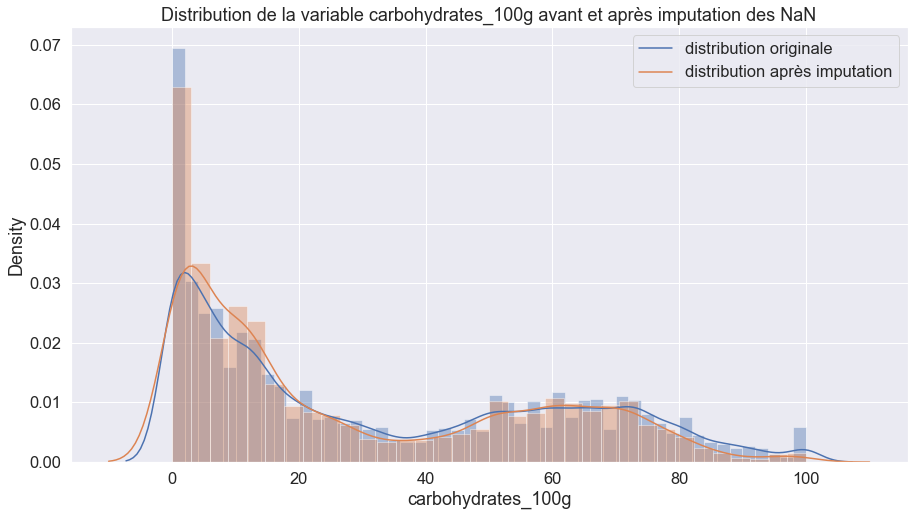

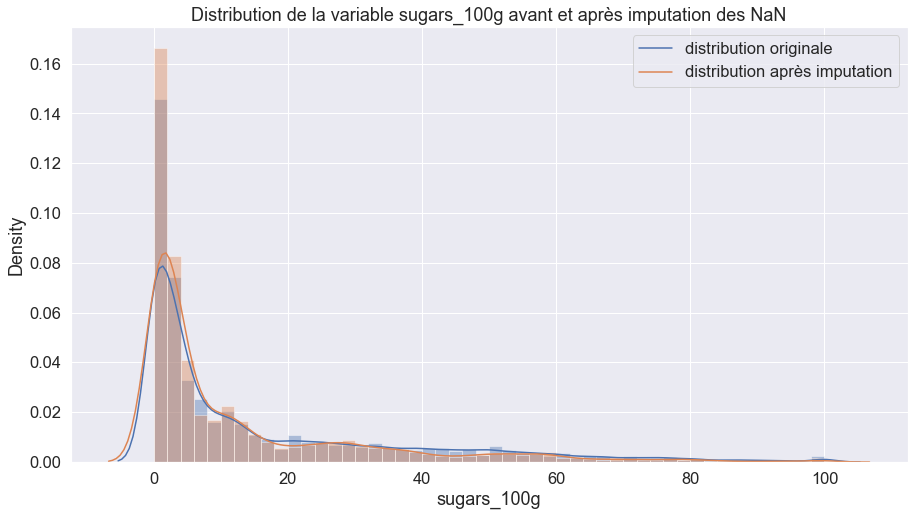

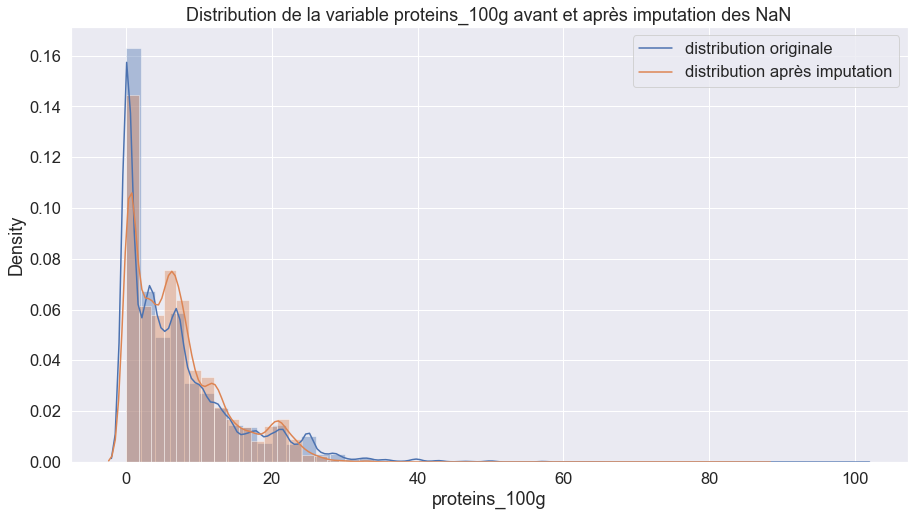

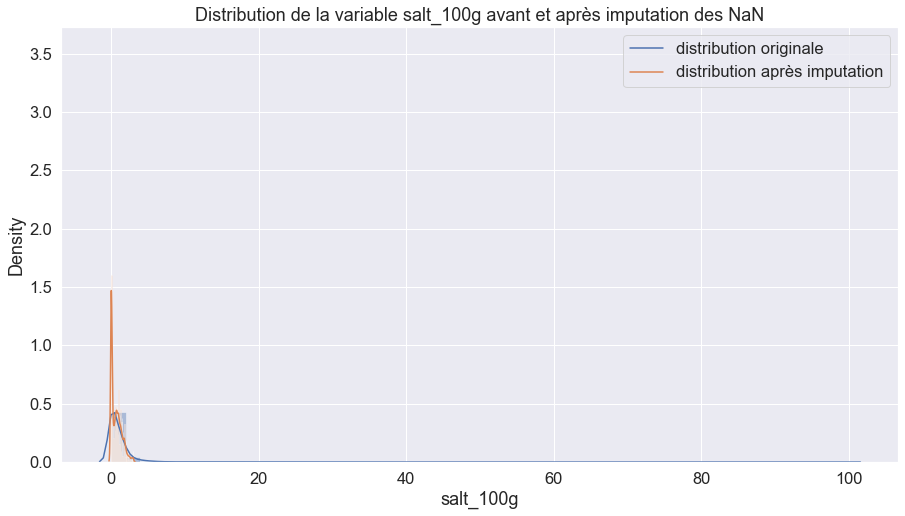

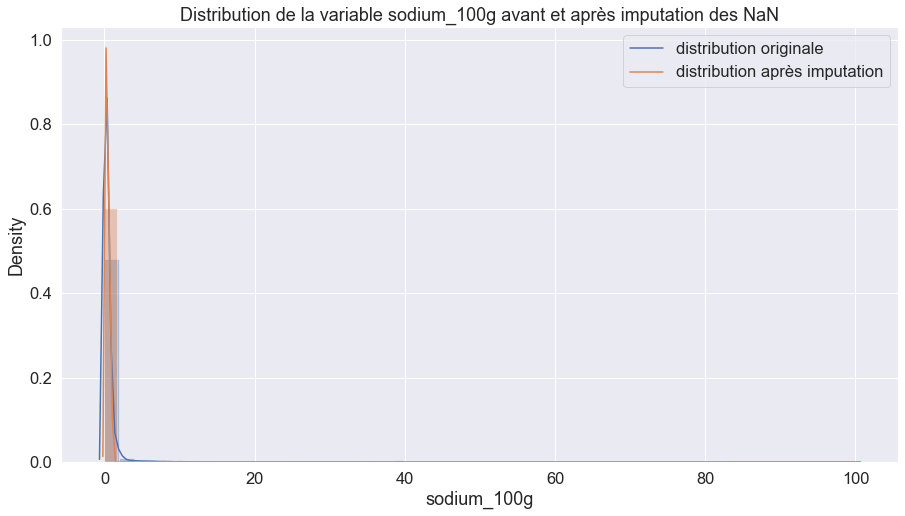

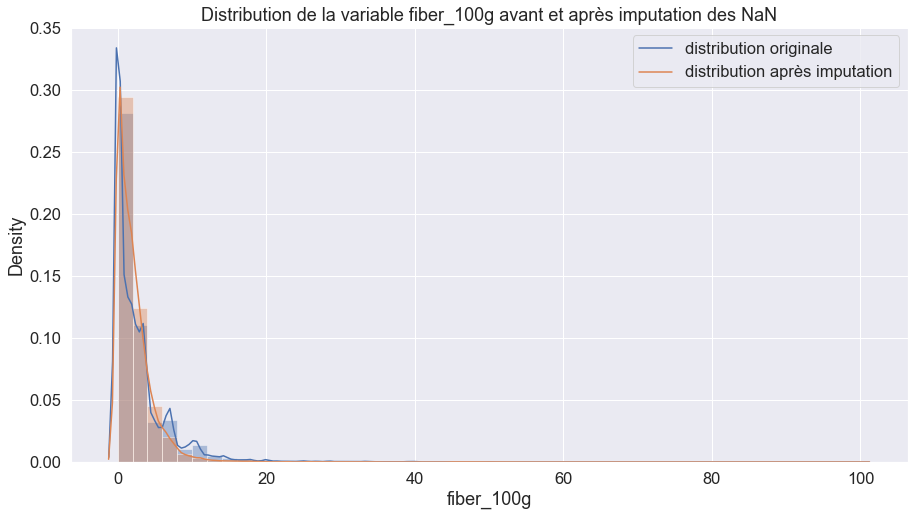

In [132]:
# Effet de l'imputation sur quelques variables numériques.
sns.set(font_scale=1.5)
for column in ['nutrition-score-fr_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'fiber_100g']:

    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna())
    sns.distplot(cleaned_short_imputed[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])

    print("  ")
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', data[column].dropna().mean(), ' / ', cleaned_short_imputed[column].mean())
    print('Ecart-Type (Avant / Après) : ', data[column].dropna().std(), ' / ', cleaned_short_imputed[column].std())

sns.set(font_scale=1)

In [133]:
# Les allures des distributions sont très proches. Lorsque l'on regarde l'impact de 
# l'imputation sur la moyenne et l'écart type, on constate que pour toutes les variables, les moyennes, 
# avant et après imputation, sont proches entre elles et que l'écart type a été amélioré, il a diminué, 
# ce qui traduit le fait que les données imputées sont moins dispersées que les données originales.

Le jeux de données est rempli à 100.00%
et il a 0.00% de données manquantes
 
 


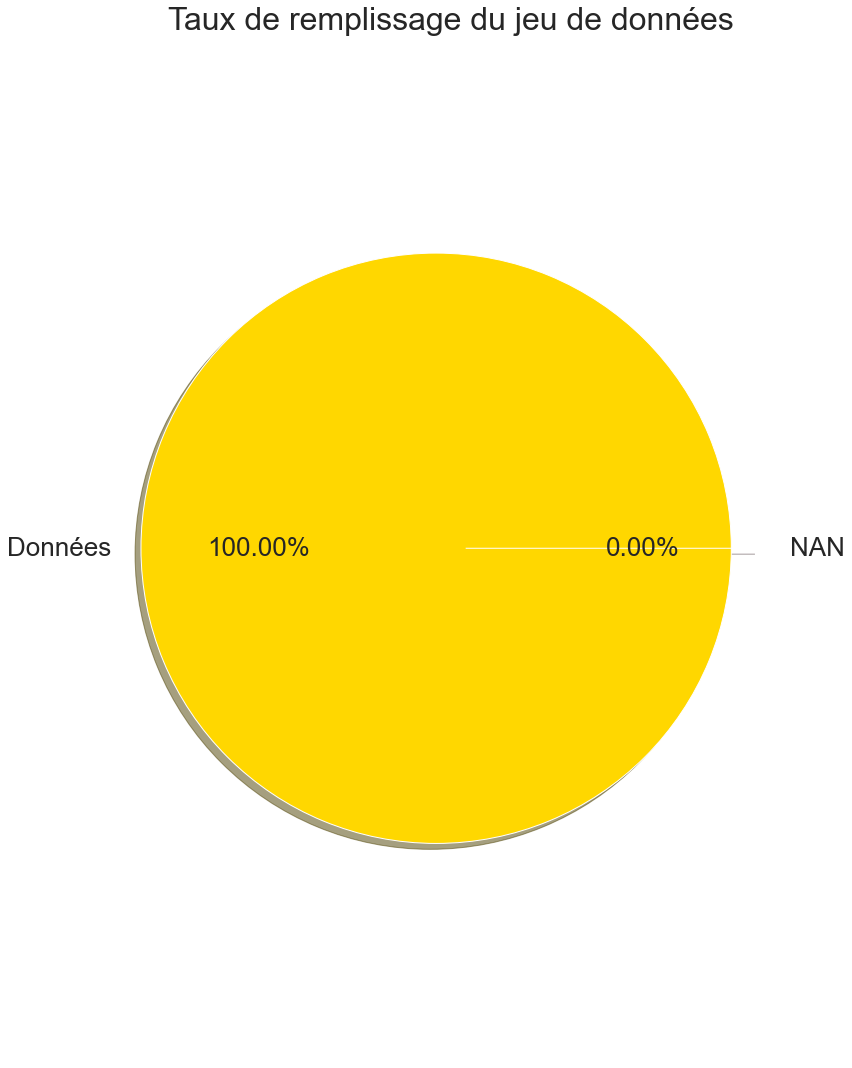

<Figure size 432x288 with 0 Axes>

In [134]:
# Taux de données manquantes après l'imputation.
NaN_pie(cleaned_short_imputed)
plt.savefig('GRAPHS/graph_nettoyage/15- Taux_NaN6')
plt.show()

In [135]:
# Données Manquantes après imputation.
cleaned_short_imputed.isna().sum()

code                                          0
product_name                                  0
packaging_tags                                0
brands_tags                                   0
origins_tags                                  0
manufacturing_places_tags                     0
labels_tags                                   0
countries                                     0
countries_tags                                0
traces_tags                                   0
additives_tags                                0
ingredients_from_palm_oil_tags                0
ingredients_that_may_be_from_palm_oil_tags    0
nutrition-score-fr_100g                       0
nutrition_grade_fr                            0
pnns_groups_1                                 0
pnns_groups_2                                 0
energy_100g                                   0
fat_100g                                      0
saturated-fat_100g                            0
carbohydrates_100g                      

In [136]:
# Imputation du nutriscore Grade grâce aux imputation précédentes du nutriscore.

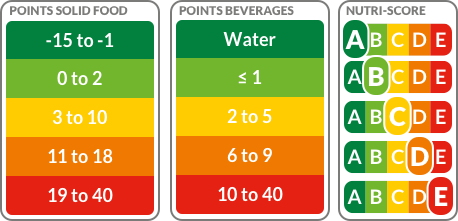

In [137]:
# Dimension du Dataset
cleaned_short_imputed.shape

(36587, 27)

In [138]:
# Nous allons maintenant diviser les nutriscores en nutrigrades.
# Source = https://quoidansmonassiette.fr/etiquetage-nutritionnel-nutri-score-5-c-vainqueur-de-la-guerre-des-logos-nutritionnels/ Le Nutri-score va donc de -15 à 40. Voici les correspondances couleurs :

# -15 à -2 : vert
# -1 à 3 : vert clair
# 4 à 11 : jaune
# 12 à 16 : orange
# Plus de 17 : rouge

def nutrigrade(score):
    if score<-15:
        grade ='NaN'
    elif score <= -1:
         grade ='A'
    elif score <=2:
         grade ='B'
    elif score<=10:
         grade ='C'
    elif score<=18:
         grade ='D'
    elif score<=40:
         grade ='E'
    else :
        grade='NaN'
    return grade
        
# nutrigrade(24)
cleaned_short_imputed['nutriscore_grade'] = cleaned_short_imputed['nutrition-score-fr_100g'].apply(nutrigrade)

In [139]:
#cleaned_short_imputed['nutrition-score-fr_100g'].unique()
#cleaned_short_imputed

In [140]:
def impute_nutri_grade (dataframe):
  for i, row in dataframe[dataframe['nutrition_grade_fr'].isnull()].iterrows():  # i: dataframe index; row: chaque ligne (row) au format series
        if (row['pnns_groups_1']!='Beverages'): #Aliments solides      
          if (row['nutrition-score-fr_100g'] >= -15) and (row['nutrition-score-fr_100g'] <= -1) :
            dataframe.loc[i,'nutrition_grade_fr']='A'
          elif (row['nutrition-score-fr_100g'] > -1) and (row['nutrition-score-fr_100g'] <= 2) :
            dataframe.loc[i,'nutrition_grade_fr']='B'
          elif (row['nutrition-score-fr_100g'] > 2) and (row['nutrition-score-fr_100g'] <= 10) :
            dataframe.loc[i,'nutrition_grade_fr']='C'
          elif (row['nutrition-score-fr_100g'] > 10) and (row['nutrition-score-fr_100g'] <= 18) :
            dataframe.loc[i,'nutrition_grade_fr']='D'
          elif (row['nutrition-score-fr_100g'] > 18) and (row['nutrition-score-fr_100g'] <= 40) :
            dataframe.loc[i,'nutrition_grade_fr']='E'
        else:
          x = row['product_name'].lower()
          if (('eau' in x) | ('water' in x) | ('agua' in x)): # Eau
            dataframe.loc[i,'nutrition_grade_fr']= 'A' 
          elif (row['nutrition-score-fr_100g'] <= -1) :
            dataframe.loc[i,'nutrition_grade_fr']='B'
          elif (row['nutrition-score-fr_100g'] > -1) and (row['nutrition-score-fr_100g'] <= 5) :
            dataframe.loc[i,'nutrition_grade_fr']='C'
          elif (row['nutrition-score-fr_100g'] > 5) and (row['nutrition-score-fr_100g'] <= 9) :
            dataframe.loc[i,'nutrition_grade_fr']='D'
          elif (row['nutrition-score-fr_100g'] > 9) and (row['nutrition-score-fr_100g'] <= 40) :
            dataframe.loc[i,'nutrition_grade_fr']='E'
          
  return dataframe

In [141]:
# DataFrame Final.
df_final = impute_nutri_grade(cleaned_short_imputed)
# Visualisation des premières lignes du DataFrame Final.
df_final.head()

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten,nutriscore_grade
0,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.5,70.0,57.5,2.50,2.5,0.09652,0.038000,0,E
5,40608754,"Pepsi, Nouveau goût !",autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.00,0.0,0.02540,0.010000,0,D
6,87177756,7Up,autre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.75,0.0,0.10000,0.039370,0,D
7,10,Madeleines nature,plastique,autre,autre,autre,autre,France,france,arachides,autre,autre,E471,12.0,d,Sugary snacks,Biscuits and cakes,1900.0,23.0,2.5,55.0,26.0,1.50,6.0,0.66000,0.259843,0,D
8,30,Cakes Raisins,plastique,autre,autre,france,recyclable,France,france,arachides,autre,autre,E471,13.0,d,Sugary snacks,Biscuits and cakes,1768.0,19.0,2.5,56.0,28.0,1.80,5.8,0.65000,0.255906,0,D


In [142]:
# Dimension du DataFrame Finale.
df_final.shape

(36587, 28)

Le jeux de données est rempli à 100.00%
et il a 0.00% de données manquantes
 
 


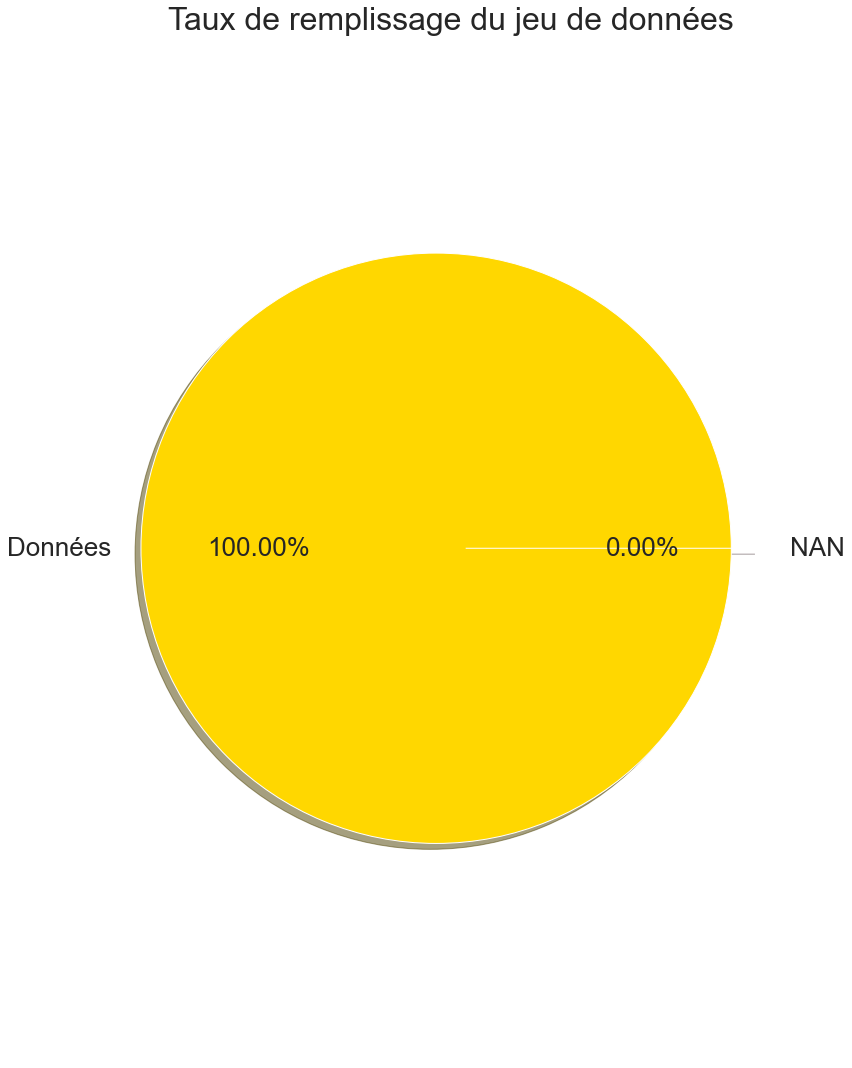

<Figure size 432x288 with 0 Axes>

In [143]:
# Taux de Remplissage du DataFrame Final.
NaN_pie(df_final)
plt.savefig('GRAPHS/graph_nettoyage/16- Taux_NaN7')
plt.show()

In [144]:
# Données Manquantes DataFrame Final.
df_final.isna().sum()

code                                          0
product_name                                  0
packaging_tags                                0
brands_tags                                   0
origins_tags                                  0
manufacturing_places_tags                     0
labels_tags                                   0
countries                                     0
countries_tags                                0
traces_tags                                   0
additives_tags                                0
ingredients_from_palm_oil_tags                0
ingredients_that_may_be_from_palm_oil_tags    0
nutrition-score-fr_100g                       0
nutrition_grade_fr                            0
pnns_groups_1                                 0
pnns_groups_2                                 0
energy_100g                                   0
fat_100g                                      0
saturated-fat_100g                            0
carbohydrates_100g                      

In [145]:
# Statistiques descriptives du DataFrame Final.
df_final.describe() 

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten
count,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000,36587.000000
mean,7.820168,1019.645651,11.017019,4.173559,28.395463,12.665825,2.219198,7.108025,0.715002,0.285088,0.077213
std,8.385417,707.601017,13.589881,5.715236,27.418836,18.313213,3.318278,6.557928,0.712123,0.575369,0.266933
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,390.000000,1.000000,0.200000,4.800000,1.100000,0.350000,1.800000,0.080000,0.031496,0.000000
50%,6.000000,929.000000,5.600000,1.600000,15.100000,4.000000,1.500000,5.800000,0.570000,0.224409,0.000000
75%,14.000000,1562.000000,17.600000,5.800000,54.000000,15.900000,3.000000,10.000000,1.198880,0.472000,0.000000
max,35.000000,3464.000000,100.000000,65.000000,100.000000,100.000000,100.000000,86.000000,3.050000,83.000000,1.000000


In [146]:
# Renommer le DataFrame Nettoyé Final.
data_cleans_finale = df_final
# Visualisation.
data_cleans_finale

,code,product_name,packaging_tags,brands_tags,origins_tags,manufacturing_places_tags,labels_tags,countries,countries_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition-score-fr_100g,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Gluten,nutriscore_grade
0,36252,Lion Peanut x2,autre,autre,autre,autre,autre,"France, US",france,autre,E322/E322I,autre,autre,22.0,e,unknown,unknown,1883.0,20.0,12.50,70.00,57.50,2.500,2.500,0.09652,0.038000,0,E
5,40608754,"Pepsi, Nouveau goût !",autre,autre,autre,autre,autre,France,france,autre,autre,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.00,10.40,10.40,0.000,0.000,0.02540,0.010000,0,D
6,87177756,7Up,autre,autre,autre,autre,autre,France,france,autre,E330,autre,autre,13.0,e,Beverages,Sweetened beverages,177.0,0.0,0.00,10.40,10.40,0.750,0.000,0.10000,0.039370,0,D
7,10,Madeleines nature,plastique,autre,autre,autre,autre,France,france,arachides,autre,autre,E471,12.0,d,Sugary snacks,Biscuits and cakes,1900.0,23.0,2.50,55.00,26.00,1.500,6.000,0.66000,0.259843,0,D
8,30,Cakes Raisins,plastique,autre,autre,france,recyclable,France,france,arachides,autre,autre,E471,13.0,d,Sugary snacks,Biscuits and cakes,1768.0,19.0,2.50,56.00,28.00,1.800,5.800,0.65000,0.255906,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49008,9556587103869,Mini Paratha,carton,autre,autre,autre,sans conservateur,France,france,lait,autre,huile-de-palme,autre,10.0,c,Cereals and potatoes,Bread,1309.0,15.0,9.00,41.40,5.10,6.500,6.000,0.90000,0.354331,0,C
49009,9577283844672,100% Pur Jus 4 agrumes,plastique,cora,autre,autre,recyclable,France,france,autre,autre,autre,autre,4.0,c,Beverages,Fruit juices,192.0,0.5,0.00,10.20,9.20,0.600,0.600,0.03000,0.011811,0,C
49010,96068779,Spearmint sans sucres,plastique,autre,autre,autre,autre,France,france,autre,autre,autre,autre,4.0,c,Sugary snacks,Sweets,1017.0,1.3,1.28,95.87,0.12,0.005,0.040,0.00500,0.001969,0,C
49012,96118580,Fisherman's Friend Miel-Citron,plastique,autre,autre,autre,autre,France,france,autre,E330,autre,autre,2.0,b,Sugary snacks,Sweets,1031.0,1.3,1.28,95.31,0.10,1.470,0.004,0.00100,0.000394,0,B


In [147]:
# Export du CSV final.
data_cleans_finale.to_csv('DONNEES/data_cleans_finale.csv', index=False)

In [148]:
# Taille du DataFrame Final nettoyé comparé à la taille du DataFrame initial.
Gap_DataFrame = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           data_cleans_finale.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             data_cleans_finale.isna().sum().sum()/
                             data_cleans_finale.shape[0] / 
                             data_cleans_finale.shape[1]*100]
                           })

In [149]:
# Visualisation.
Gap_DataFrame

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(320772, 162)",76.365456
1,données nettoyées,"(36587, 28)",0.000000


In [150]:
# Lorsque l'on compare le DataFrame initial et le DataFrame nettoyé, on voit que l'on passe de 320772 lignes et 162 colonnes à 32637 lignes pour 27 colonnes. De plus, on passe de 79,22% de données manquantes du DataFrame initial à 0,00 % au DataFrame nettoyé.